**Machine Learning I Final Project**

Lindsay Neff, Lejla Skahic, Prachi Pathak, Stephanie Palanca


In [ ]:
# import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
# allow access to google drive files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#change directory to project files page
import os
os.chdir('/content/drive/MyDrive/Project Files')

In [ ]:
# read in csv files for bikeshare data -- only using months January - April 2022
df_Jan = pd.read_csv('202201-capitalbikeshare-tripdata.csv')
df_Feb = pd.read_csv('202202-capitalbikeshare-tripdata.csv')
df_March = pd.read_csv('202203-capitalbikeshare-tripdata.csv')
df_April = pd.read_csv('202204-capitalbikeshare-tripdata.csv')

### Data Cleansing for bikeshare data

In [ ]:
# concatenating data into one dataframe of all four months
df = pd.concat([df_Jan, df_Feb, df_March, df_April])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828621 entries, 0 to 310434
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             828621 non-null  object 
 1   rideable_type       828621 non-null  object 
 2   started_at          828621 non-null  object 
 3   ended_at            828621 non-null  object 
 4   start_station_name  792027 non-null  object 
 5   start_station_id    792027 non-null  float64
 6   end_station_name    786251 non-null  object 
 7   end_station_id      786251 non-null  float64
 8   start_lat           828621 non-null  float64
 9   start_lng           828621 non-null  float64
 10  end_lat             827170 non-null  float64
 11  end_lng             827170 non-null  float64
 12  member_casual       828621 non-null  object 
dtypes: float64(6), object(7)
memory usage: 88.5+ MB


In [ ]:
# observe information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828621 entries, 0 to 310434
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             828621 non-null  object 
 1   rideable_type       828621 non-null  object 
 2   started_at          828621 non-null  object 
 3   ended_at            828621 non-null  object 
 4   start_station_name  792027 non-null  object 
 5   start_station_id    792027 non-null  float64
 6   end_station_name    786251 non-null  object 
 7   end_station_id      786251 non-null  float64
 8   start_lat           828621 non-null  float64
 9   start_lng           828621 non-null  float64
 10  end_lat             827170 non-null  float64
 11  end_lng             827170 non-null  float64
 12  member_casual       828621 non-null  object 
dtypes: float64(6), object(7)
memory usage: 88.5+ MB


In [ ]:
# observe first few rows of data
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.0,Potomac Ave & Main Line Blvd,31910.0,38.820932,-77.053096,38.822738,-77.049265,member
1,7F4A0E2F03EADEB7,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,31283.0,10th & G St NW,31274.0,38.903658,-77.031737,38.898243,-77.026235,member
2,30DD8A84164843AD,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,31283.0,12th & L St NW,31251.0,38.903658,-77.031737,38.903819,-77.028400,member
3,FC67665D7682D0A6,classic_bike,2022-01-27 20:09:25,2022-01-27 20:37:02,New York Ave & Hecht Ave NE,31518.0,Nannie Helen Burroughs & Minnesota Ave NE,31704.0,38.915604,-76.983683,38.901385,-76.941877,casual
4,7854F7CC4F631A1E,classic_bike,2022-01-07 16:14:28,2022-01-07 16:16:13,Falls Church City Hall / Park Ave & Little Fal...,32608.0,Pennsylvania Ave & Park Ave,32603.0,38.885434,-77.173605,38.887403,-77.176992,member


In [ ]:
# Converting to datetime index (create the start datetime and end datetime)
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [ ]:
# Converting to started and end dates to just include the dates 
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date

In [ ]:
#Converting to datetime index
df['started_at_date'] = pd.to_datetime(df['started_at_date'])
df['ended_at_date'] = pd.to_datetime(df['ended_at_date'])

In [ ]:
#Splitting up days and months
df['day'] = df['started_at_date'].dt.day
df['month'] = df['started_at_date'].dt.month
df['year'] = df['started_at_date'].dt.year

In [ ]:
#Getting seasons for each month
def get_season(row):
    month = row['month']
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

In [ ]:
#Creating seasons column 
df['seasons'] = df.apply(get_season, axis=1)

In [ ]:
#creating day of week column 
df['day_of_week'] = df['started_at_date'].dt.day_name()
df['start_hour'] = df['started_at'].dt.hour
df['end_hour'] = df['ended_at'].dt.hour

In [ ]:
# view data with addition of new columns
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,started_at_date,ended_at_date,day,month,year,seasons,day_of_week,start_hour,end_hour
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.0,Potomac Ave & Main Line Blvd,31910.0,38.820932,-77.053096,...,member,2022-01-06,2022-01-06,6,1,2022,Winter,Thursday,18,18
1,7F4A0E2F03EADEB7,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,31283.0,10th & G St NW,31274.0,38.903658,-77.031737,...,member,2022-01-31,2022-01-31,31,1,2022,Winter,Monday,19,19
2,30DD8A84164843AD,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,31283.0,12th & L St NW,31251.0,38.903658,-77.031737,...,member,2022-01-07,2022-01-07,7,1,2022,Winter,Friday,15,15
3,FC67665D7682D0A6,classic_bike,2022-01-27 20:09:25,2022-01-27 20:37:02,New York Ave & Hecht Ave NE,31518.0,Nannie Helen Burroughs & Minnesota Ave NE,31704.0,38.915604,-76.983683,...,casual,2022-01-27,2022-01-27,27,1,2022,Winter,Thursday,20,20
4,7854F7CC4F631A1E,classic_bike,2022-01-07 16:14:28,2022-01-07 16:16:13,Falls Church City Hall / Park Ave & Little Fal...,32608.0,Pennsylvania Ave & Park Ave,32603.0,38.885434,-77.173605,...,member,2022-01-07,2022-01-07,7,1,2022,Winter,Friday,16,16


In [ ]:
# add a column called holiday that has a boolean value of true if a holiday in that time period or false if not
df['holiday'] = np.where(df['started_at'] == ('2022-01-01' or '2022-01-17'or '2022-02-21'or '2022-04-15'), True, False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828621 entries, 0 to 310434
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             828621 non-null  object        
 1   rideable_type       828621 non-null  object        
 2   started_at          828621 non-null  datetime64[ns]
 3   ended_at            828621 non-null  datetime64[ns]
 4   start_station_name  792027 non-null  object        
 5   start_station_id    792027 non-null  float64       
 6   end_station_name    786251 non-null  object        
 7   end_station_id      786251 non-null  float64       
 8   start_lat           828621 non-null  float64       
 9   start_lng           828621 non-null  float64       
 10  end_lat             827170 non-null  float64       
 11  end_lng             827170 non-null  float64       
 12  member_casual       828621 non-null  object        
 13  started_at_date     828621 no

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,started_at_date,ended_at_date,day,month,year,seasons,day_of_week,start_hour,end_hour,holiday
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.0,Potomac Ave & Main Line Blvd,31910.0,38.820932,-77.053096,...,2022-01-06,2022-01-06,6,1,2022,Winter,Thursday,18,18,False
1,7F4A0E2F03EADEB7,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,31283.0,10th & G St NW,31274.0,38.903658,-77.031737,...,2022-01-31,2022-01-31,31,1,2022,Winter,Monday,19,19,False
2,30DD8A84164843AD,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,31283.0,12th & L St NW,31251.0,38.903658,-77.031737,...,2022-01-07,2022-01-07,7,1,2022,Winter,Friday,15,15,False
3,FC67665D7682D0A6,classic_bike,2022-01-27 20:09:25,2022-01-27 20:37:02,New York Ave & Hecht Ave NE,31518.0,Nannie Helen Burroughs & Minnesota Ave NE,31704.0,38.915604,-76.983683,...,2022-01-27,2022-01-27,27,1,2022,Winter,Thursday,20,20,False
4,7854F7CC4F631A1E,classic_bike,2022-01-07 16:14:28,2022-01-07 16:16:13,Falls Church City Hall / Park Ave & Little Fal...,32608.0,Pennsylvania Ave & Park Ave,32603.0,38.885434,-77.173605,...,2022-01-07,2022-01-07,7,1,2022,Winter,Friday,16,16,False


In [ ]:
spring = (df['seasons'] == 'Spring').sum()
print(spring)

564685


In [ ]:
winter = (df['seasons'] == 'Winter').sum()
print(winter)
#winter is the least popular season for bikeshare usage, which is not surprising  

263936


In [ ]:
summer = (df['seasons'] == 'Summer').sum()
print(summer)
#summer is removed from data (not in months included)

0


In [ ]:
fall = (df['seasons'] == 'Fall').sum()
print(fall)
# fall is not in months included

0


In [ ]:
#viewing missing data
print(df.isnull().sum())

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    36594
start_station_id      36594
end_station_name      42370
end_station_id        42370
start_lat                 0
start_lng                 0
end_lat                1451
end_lng                1451
member_casual             0
started_at_date           0
ended_at_date             0
day                       0
month                     0
year                      0
seasons                   0
day_of_week               0
start_hour                0
end_hour                  0
holiday                   0
dtype: int64


In [ ]:
#removing rows containing missing data
df.dropna(inplace=True)

In [ ]:
#check again for missing data
print(df.isnull().sum())

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
started_at_date       0
ended_at_date         0
day                   0
month                 0
year                  0
seasons               0
day_of_week           0
start_hour            0
end_hour              0
holiday               0
dtype: int64


### Weather Data

In [ ]:
# load in weather dataframe from blackboard
df_weather = pd.read_csv('DC Weather 2022-01-01 to 2022-12-31.csv')

df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Washington,DC,USA",2022-01-01,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,...,0.6,0,NaN,2022-01-01T07:26:53,2022-01-01T16:56:53,0.99,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,A..."
1,"Washington,DC,USA",2022-01-02,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,...,1.7,1,NaN,2022-01-02T07:27:00,2022-01-02T16:57:43,1.00,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."
2,"Washington,DC,USA",2022-01-03,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,...,0.0,0,NaN,2022-01-03T07:27:05,2022-01-03T16:58:34,0.00,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,A..."
3,"Washington,DC,USA",2022-01-04,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,...,5.4,6,NaN,2022-01-04T07:27:07,2022-01-04T16:59:27,0.02,Clear,Clear conditions throughout the day.,snow,"KDCA,72405013743,72403793728,D6279,F0198,KADW,..."
4,"Washington,DC,USA",2022-01-05,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,...,2.2,1,NaN,2022-01-05T07:27:08,2022-01-05T17:00:21,0.05,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."


In [ ]:
# check information and data types of weather data frame
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              365 non-null    object 
 1   datetime          365 non-null    object 
 2   tempmax           365 non-null    float64
 3   tempmin           365 non-null    float64
 4   temp              365 non-null    float64
 5   feelslikemax      365 non-null    float64
 6   feelslikemin      365 non-null    float64
 7   feelslike         365 non-null    float64
 8   dew               365 non-null    float64
 9   humidity          365 non-null    float64
 10  precip            365 non-null    float64
 11  precipprob        365 non-null    int64  
 12  precipcover       365 non-null    float64
 13  preciptype        134 non-null    object 
 14  snow              365 non-null    float64
 15  snowdepth         365 non-null    float64
 16  windgust          362 non-null    float64
 1

In [ ]:
# convert the datetime column to a datetime variable
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])

In [ ]:
# check for missing values
print(df_weather.isnull().sum()) 

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          231
snow                  0
snowdepth             0
windgust              3
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk            9
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64


In [ ]:
# drop unnecessary columns (values that are redundant or not useful)
df_weather = df_weather.drop(columns=['name', 'description', 'precipcover', 'precipprob', 'stations','feelslikemin', 'feelslikemax', 'sealevelpressure', 'solarenergy', 'severerisk', 'moonphase', 'sunrise','sunset', 'solarradiation','windgust', 'winddir','tempmin','tempmax','snowdepth','dew'])

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    365 non-null    datetime64[ns]
 1   temp        365 non-null    float64       
 2   feelslike   365 non-null    float64       
 3   humidity    365 non-null    float64       
 4   precip      365 non-null    float64       
 5   preciptype  134 non-null    object        
 6   snow        365 non-null    float64       
 7   windspeed   365 non-null    float64       
 8   cloudcover  365 non-null    float64       
 9   visibility  365 non-null    float64       
 10  uvindex     365 non-null    int64         
 11  conditions  365 non-null    object        
 12  icon        365 non-null    object        
dtypes: datetime64[ns](1), float64(8), int64(1), object(3)
memory usage: 37.2+ KB


In [ ]:
# check the correlation between variables in the weather data set using a correlation matrix
df_weather.corr()

,temp,feelslike,humidity,precip,snow,windspeed,cloudcover,visibility,uvindex
temp,1.000000,0.997007,0.288512,-0.002905,-0.231029,-0.190415,0.060824,0.152448,0.342280
feelslike,0.997007,1.000000,0.304624,-0.006262,-0.245971,-0.215219,0.062700,0.145637,0.337323
humidity,0.288512,0.304624,1.000000,0.444520,0.047815,-0.178322,0.589772,-0.572750,-0.451616
precip,-0.002905,-0.006262,0.444520,1.000000,0.178936,0.180280,0.376210,-0.605659,-0.381377
snow,-0.231029,-0.245971,0.047815,0.178936,1.000000,0.116296,0.026092,-0.208541,-0.157938
windspeed,-0.190415,-0.215219,-0.178322,0.180280,0.116296,1.000000,0.131668,-0.076992,-0.110478
cloudcover,0.060824,0.062700,0.589772,0.376210,0.026092,0.131668,1.000000,-0.457148,-0.558029
visibility,0.152448,0.145637,-0.572750,-0.605659,-0.208541,-0.076992,-0.457148,1.000000,0.458893
uvindex,0.342280,0.337323,-0.451616,-0.381377,-0.157938,-0.110478,-0.558029,0.458893,1.000000


<Axes: >

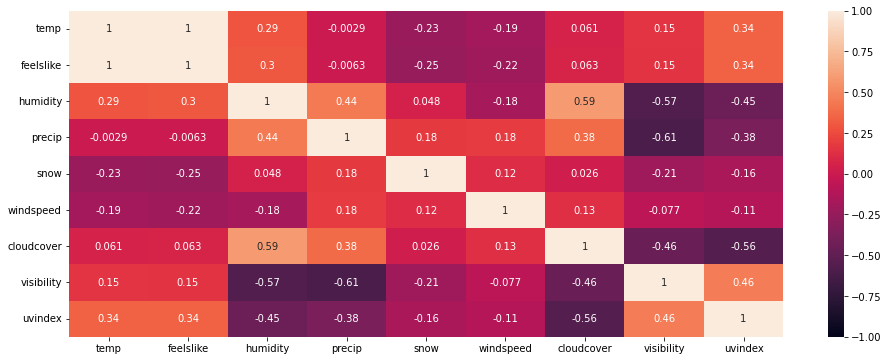

In [ ]:
# use a heatmap to visualize the correlations between weather variables
# temp and feels like are highly positively correlated
# cloud cover and humidity also positively correlated
# visibility and precipitation negatively corrrelated
plt.figure(figsize=(16,6))
sns.heatmap(df_weather.corr(), vmin=-1, vmax=1, annot=True)

### Crashes Data

In [ ]:
# load in crashes data &  view first few rows
df_crashes = pd.read_csv('Crashes_in_DC.csv')
df_crashes.head()

<ipython-input-34-e9ba06a61bc9>:1: DtypeWarning: Columns (4,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_crashes = pd.read_csv('Crashes_in_DC.csv')


,X,Y,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,...,LASTUPDATEDATE,MPDLATITUDE,MPDLONGITUDE,MPDGEOX,MPDGEOY,FATALPASSENGER,MAJORINJURIESPASSENGER,MINORINJURIESPASSENGER,UNKNOWNINJURIESPASSENGER,MAR_ID
0,-76.999928,38.822330,169446243,23593866,11022226,2011/02/18 22:15:00+00,13081512,166.92,31.38,-9.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,28348
1,-77.002765,38.961273,169446244,23595894,11023869,2011/02/22 05:00:00+00,12066752,254.00,0.00,12474.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,901658
2,-77.031677,38.928643,169446245,23595916,11023927,2011/02/22 17:16:00+00,11048752,2314.75,0.06,3413.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,226595
3,-77.004595,38.908905,169446246,23596375,11023848,2011/02/22 12:30:00+00,12064672,423.22,0.00,5546.0,...,NaN,38.908897,-77.004593,NaN,NaN,0,0,0,0,287346
4,-77.027202,38.937847,169446247,23596662,11022897,2011/02/20 03:00:00+00,11001002,3385.31,0.01,3190.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,305089


In [ ]:
# observe information about the crashes data type and columns
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283747 entries, 0 to 283746
Data columns (total 58 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   X                           283747 non-null  float64
 1   Y                           283747 non-null  float64
 2   OBJECTID                    283747 non-null  int64  
 3   CRIMEID                     283747 non-null  int64  
 4   CCN                         283747 non-null  object 
 5   REPORTDATE                  282703 non-null  object 
 6   ROUTEID                     283747 non-null  object 
 7   MEASURE                     283747 non-null  float64
 8   OFFSET                      283747 non-null  float64
 9   STREETSEGID                 215899 non-null  float64
 10  ROADWAYSEGID                215899 non-null  float64
 11  FROMDATE                    283486 non-null  object 
 12  TODATE                      0 non-null       float64
 13  ADDRESS       

In [ ]:
# check null values
print(df_crashes.isnull().sum()) 

X                                  0
Y                                  0
OBJECTID                           0
CRIMEID                            0
CCN                                0
REPORTDATE                      1044
ROUTEID                            0
MEASURE                            0
OFFSET                             0
STREETSEGID                    67848
ROADWAYSEGID                   67848
FROMDATE                         261
TODATE                        283747
ADDRESS                           82
LATITUDE                           9
LONGITUDE                          9
XCOORD                             0
YCOORD                             0
WARD                               2
EVENTID                        29720
MAR_ADDRESS                    13666
MAR_SCORE                          0
MAJORINJURIES_BICYCLIST            0
MINORINJURIES_BICYCLIST            0
UNKNOWNINJURIES_BICYCLIST          0
FATAL_BICYCLIST                    0
MAJORINJURIES_DRIVER               0
M

In [ ]:
# drop unnecessary columns 
# determined that the data we could use was location of crashes with respect to ward closest to the two stations of capital bikeshare that we are measuring
df_crashes = df_crashes.drop(columns=['X','Y','REPORTDATE','OBJECTID','CRIMEID','CCN','ROUTEID','MEASURE','OFFSET','STREETSEGID','ROADWAYSEGID','ADDRESS','LATITUDE','LONGITUDE','XCOORD','YCOORD','EVENTID','MAR_ADDRESS','MAR_SCORE','MAJORINJURIES_BICYCLIST','MINORINJURIES_BICYCLIST','UNKNOWNINJURIES_BICYCLIST','FATAL_BICYCLIST','MAJORINJURIES_DRIVER','MINORINJURIES_DRIVER','UNKNOWNINJURIES_DRIVER','FATAL_DRIVER','MAJORINJURIES_PEDESTRIAN','MINORINJURIES_PEDESTRIAN','UNKNOWNINJURIES_PEDESTRIAN','FATAL_PEDESTRIAN','TOTAL_VEHICLES','TOTAL_BICYCLES','TOTAL_PEDESTRIANS','PEDESTRIANSIMPAIRED','BICYCLISTSIMPAIRED','DRIVERSIMPAIRED','TOTAL_TAXIS','TOTAL_GOVERNMENT','SPEEDING_INVOLVED','NEARESTINTROUTEID','NEARESTINTSTREETNAME','OFFINTERSECTION','INTAPPROACHDIRECTION','LOCATIONERROR','LASTUPDATEDATE','MPDLATITUDE','MPDLONGITUDE','MPDGEOX','MPDGEOY','FATALPASSENGER','MAJORINJURIESPASSENGER','MINORINJURIESPASSENGER','UNKNOWNINJURIESPASSENGER','MAR_ID'])

In [ ]:
# convert to started and end dates to just include the dates 
df_crashes['Hour'] = pd.to_datetime(df_crashes['FROMDATE']).dt.hour
df_crashes['FROMDATE'] = pd.to_datetime(df_crashes['FROMDATE']).dt.date

In [ ]:
# Convert to datetime index
df_crashes['FROMDATE'] = pd.to_datetime(df_crashes['FROMDATE'])

In [ ]:
# finding total count of accidents per ward
# we selected ward 2 because its zone encompassed the two stations and therefore considered accidents in a relevant vicinity
df_crashes1 = df_crashes[df_crashes['WARD']=="Ward 2"]
df_crashes2 = df_crashes1.groupby(['FROMDATE']).size()
df_crashes2 = df_crashes2.reset_index(name = 'ward2_accidents')

In [ ]:
# observe new df on crashes
df_crashes2

,FROMDATE,ward2_accidents
0,1900-01-01,2
1,1915-01-16,1
2,1976-05-01,1
3,1989-02-22,1
4,1990-04-20,1
...,...,...
5437,2023-03-04,11
5438,2023-03-05,5
5439,2023-03-06,4
5440,2023-03-07,9


# 21st & I Street NW

## PU & DO dataframes

In [ ]:
# Counting daily pick ups for 21st and I St NW
df_sub1 = df[df['start_station_name']=="21st & I St NW"]
df_grp1 = df_sub1.groupby(['started_at_date', 'start_station_name', 'seasons','day_of_week','holiday','member_casual','start_hour']).size()
df_puI = df_grp1.reset_index(name = 'pu_ct')
df_puI['No. Docks'] = 32
df_puI

,started_at_date,start_station_name,seasons,day_of_week,holiday,member_casual,start_hour,pu_ct,No. Docks
0,2022-01-01,21st & I St NW,Winter,Saturday,False,casual,16,2,32
1,2022-01-01,21st & I St NW,Winter,Saturday,False,casual,21,1,32
2,2022-01-01,21st & I St NW,Winter,Saturday,False,casual,22,3,32
3,2022-01-01,21st & I St NW,Winter,Saturday,False,member,5,1,32
4,2022-01-02,21st & I St NW,Winter,Sunday,False,casual,12,1,32
...,...,...,...,...,...,...,...,...,...
1724,2022-04-30,21st & I St NW,Spring,Saturday,False,member,18,2,32
1725,2022-04-30,21st & I St NW,Spring,Saturday,False,member,20,2,32
1726,2022-04-30,21st & I St NW,Spring,Saturday,False,member,21,3,32
1727,2022-04-30,21st & I St NW,Spring,Saturday,False,member,22,5,32


In [ ]:
df_sub3 = df_puI[df_puI['day_of_week']=='Tuesday']
df_sub3['pu_ct'].sum()
# sum pickups on Tuesday (most popular day of week)

678

In [ ]:
# Counting daily drop offs for 21st & I St NW
df_sub3 = df[df['end_station_name']=='21st & I St NW']
df_grp3 = df_sub3.groupby(['ended_at_date', 'end_station_name', 'seasons','day_of_week','holiday','member_casual','end_hour']).size()
df_doI = df_grp3.reset_index(name = 'do_ct')
df_doI

,ended_at_date,end_station_name,seasons,day_of_week,holiday,member_casual,end_hour,do_ct
0,2022-01-01,21st & I St NW,Winter,Saturday,False,casual,1,3
1,2022-01-01,21st & I St NW,Winter,Saturday,False,casual,15,2
2,2022-01-02,21st & I St NW,Winter,Sunday,False,casual,12,1
3,2022-01-02,21st & I St NW,Winter,Sunday,False,member,0,1
4,2022-01-02,21st & I St NW,Winter,Sunday,False,member,9,1
...,...,...,...,...,...,...,...,...
1769,2022-04-30,21st & I St NW,Spring,Saturday,False,member,19,5
1770,2022-04-30,21st & I St NW,Spring,Saturday,False,member,20,3
1771,2022-04-30,21st & I St NW,Spring,Saturday,False,member,21,2
1772,2022-04-30,21st & I St NW,Spring,Saturday,False,member,22,1


In [ ]:
df_sub3 = df_doI[df_doI['day_of_week']=='Tuesday']
df_sub3['do_ct'].sum()
# sum dropoffs on Tuesday (most popular day of week)

697

In [ ]:
df_sub3['do_ct'].sum()

697

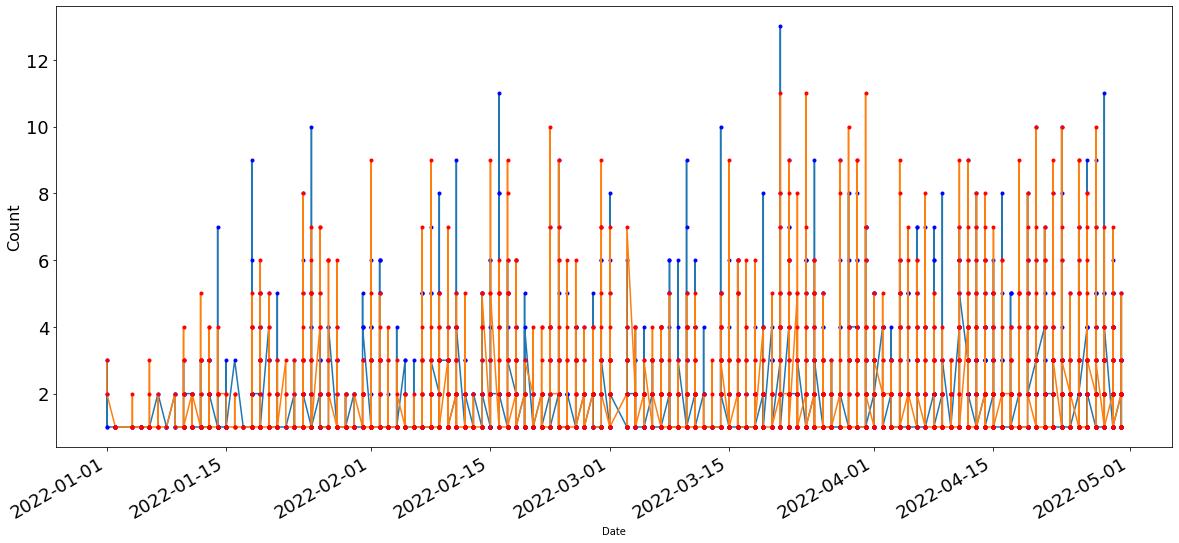

In [ ]:
#Time series plot - dates vs. number of pick ups and drop offs for 21st & I
fig, ax1 = plt.subplots(figsize=(20, 9))
ax1.plot_date( df_puI['started_at_date'], df_puI['pu_ct'],linestyle = 'solid',markeredgecolor = 'blue',markerfacecolor = 'blue', markersize = 3)
ax1.plot_date( df_doI['ended_at_date'], df_doI['do_ct'],linestyle = 'solid',markeredgecolor = 'red',markerfacecolor = 'red', markersize = 3)

ax1.set_xlabel('Date',fontsize=10)
ax1.set_ylabel('Count',fontsize=16)
plt.gcf().autofmt_xdate()

plt.tick_params(labelsize=18)
plt.show()  

<Axes: >

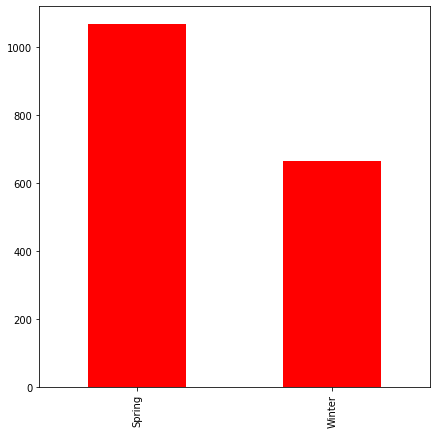

In [ ]:
# plot usage for spring and winterseasons
fig, ax = plt.subplots(figsize = (7,7))
df_puI['seasons'].value_counts().plot(ax=ax, kind='bar', color='red')

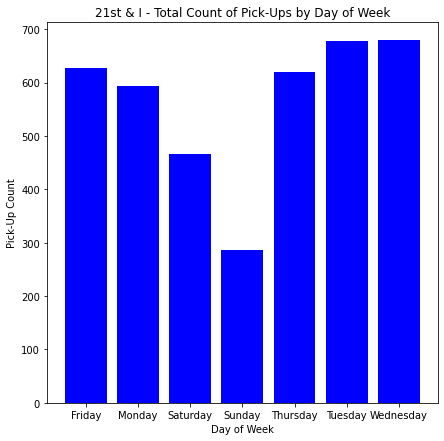

In [ ]:
#Plot pickups for 21st and I by day of week for time frame
df_grouped = df_puI.groupby('day_of_week')['pu_ct'].sum().reset_index()
fig, ax = plt.subplots(figsize=(7, 7))
plt.bar(df_grouped['day_of_week'], df_grouped['pu_ct'], color='blue')
plt.title('21st & I - Total Count of Pick-Ups by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Pick-Up Count')
plt.show()

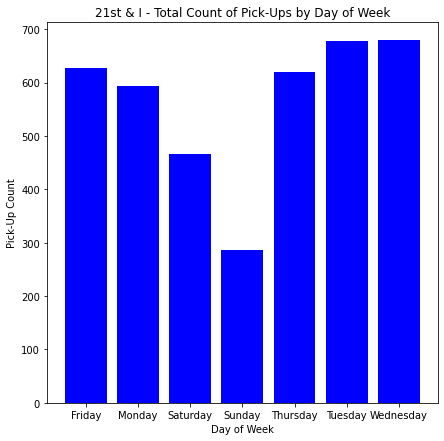

In [ ]:
df_grouped = df_puI.groupby('day_of_week')['pu_ct'].sum().reset_index()
fig, ax = plt.subplots(figsize=(7, 7))
plt.bar(df_grouped['day_of_week'], df_grouped['pu_ct'], color='blue')
plt.title('21st & I - Total Count of Pick-Ups by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Pick-Up Count')
plt.show()

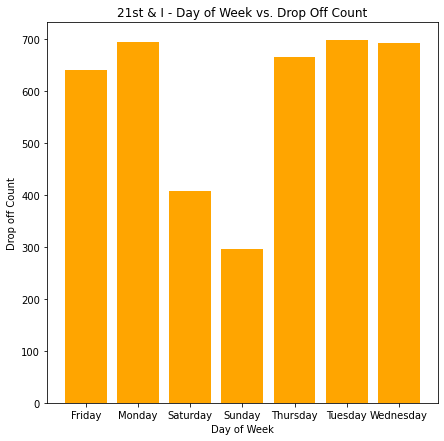

In [ ]:
# plot drop offs by day of week for 21st and I street
df_grouped2 = df_doI.groupby('day_of_week')['do_ct'].sum().reset_index()
fig, ax = plt.subplots(figsize = (7,7))
plt.bar(df_grouped2['day_of_week'], df_grouped2['do_ct'], color='orange')
plt.title('21st & I - Day of Week vs. Drop Off Count')
plt.xlabel('Day of Week')
plt.ylabel('Drop off Count')
plt.show()

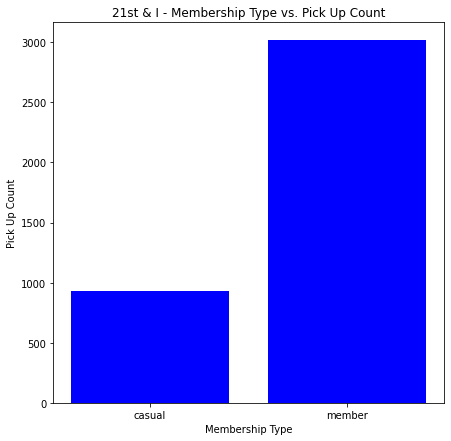

In [ ]:
# plot pickups by membership for 21st and I
df_grouped = df_puI.groupby('member_casual')['pu_ct'].sum().reset_index()

fig, ax = plt.subplots(figsize = (7,7))
plt.bar(df_grouped['member_casual'], df_grouped['pu_ct'], color='blue')
plt.title('21st & I - Membership Type vs. Pick Up Count')
plt.xlabel('Membership Type')
plt.ylabel('Pick Up Count')
plt.show()

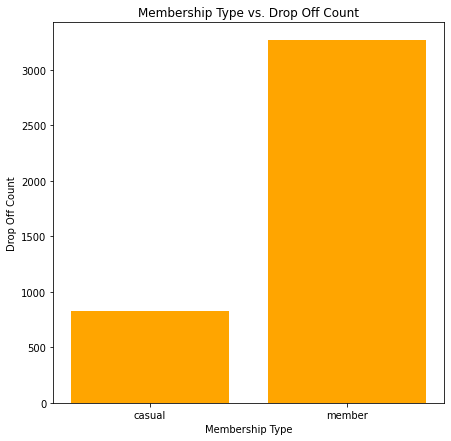

In [ ]:
# plot drop offs by member for 21st and I
df_grouped = df_doI.groupby('member_casual')['do_ct'].sum().reset_index()
fig, ax = plt.subplots(figsize = (7,7))
plt.bar(df_grouped['member_casual'], df_grouped['do_ct'], color='orange')
plt.title('Membership Type vs. Drop Off Count')
plt.xlabel('Membership Type')
plt.ylabel('Drop Off Count')
plt.show()

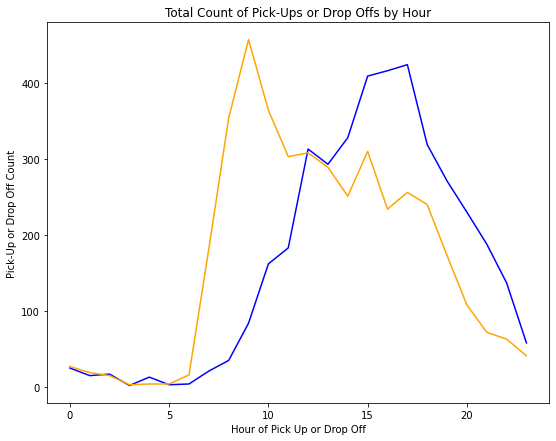

In [ ]:
# plot total pickup count and drop off count by hour using start hour or end hour (pickups in blue, drop offs in orange)
df_grouped = df_puI.groupby('start_hour')['pu_ct'].sum().reset_index()
df_grouped2 = df_doI.groupby('end_hour')['do_ct'].sum().reset_index()
fig, ax = plt.subplots(figsize=(9, 7))
plt.plot(df_grouped['start_hour'], df_grouped['pu_ct'], color='blue')
plt.plot(df_grouped2['end_hour'], df_grouped2['do_ct'], color='orange')
plt.title('Total Count of Pick-Ups or Drop Offs by Hour')
plt.xlabel('Hour of Pick Up or Drop Off')
plt.ylabel('Pick-Up or Drop Off Count')
plt.show()

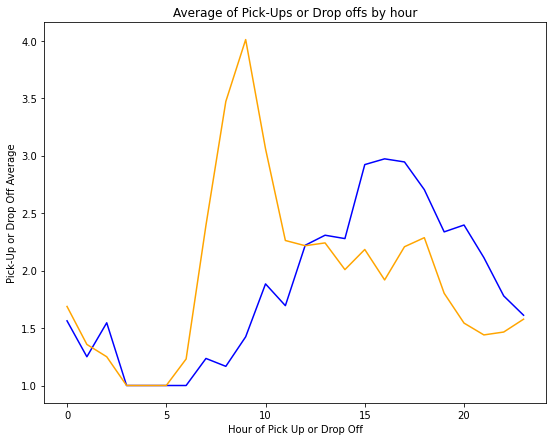

In [ ]:
df_grouped = df_puI.groupby('start_hour')['pu_ct'].mean().reset_index()
df_grouped2 = df_doI.groupby('end_hour')['do_ct'].mean().reset_index()
fig, ax = plt.subplots(figsize=(9, 7))
plt.plot(df_grouped['start_hour'], df_grouped['pu_ct'], color='blue')
plt.plot(df_grouped2['end_hour'], df_grouped2['do_ct'], color='orange')
plt.title('Average of Pick-Ups or Drop offs by hour')
plt.xlabel('Hour of Pick Up or Drop Off')
plt.ylabel('Pick-Up or Drop Off Average')
plt.show()

array([[<Axes: title={'center': 'started_at_date'}>,
        <Axes: title={'center': 'start_hour'}>],
       [<Axes: title={'center': 'pu_ct'}>,
        <Axes: title={'center': 'No. Docks'}>]], dtype=object)

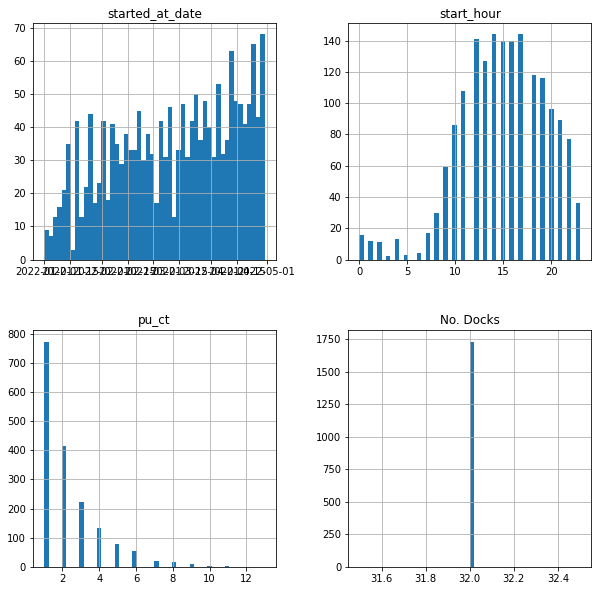

In [ ]:
# Pick ups 21st & I
# count of pickups by date, by hour, and count of different pickup sizes for 32 docks
df_puI[df_puI.columns].hist(bins=50, figsize=(10, 10))

### Merging of datasets - Bikeshare & Weather

In [ ]:
# Merge together weather data and bikeshare data on start date and datetime (for pickup data for 21st and I)
df_I_pu = df_puI.merge(df_weather, left_on='started_at_date', right_on='datetime') 

In [ ]:
df_I_pu

,started_at_date,start_station_name,seasons,day_of_week,holiday,member_casual,start_hour,pu_ct,No. Docks,datetime,...,humidity,precip,preciptype,snow,windspeed,cloudcover,visibility,uvindex,conditions,icon
0,2022-01-01,21st & I St NW,Winter,Saturday,False,casual,16,2,32,2022-01-01,...,92.1,0.448,rain,0.0,11.4,99.5,6.2,0,"Rain, Overcast",rain
1,2022-01-01,21st & I St NW,Winter,Saturday,False,casual,21,1,32,2022-01-01,...,92.1,0.448,rain,0.0,11.4,99.5,6.2,0,"Rain, Overcast",rain
2,2022-01-01,21st & I St NW,Winter,Saturday,False,casual,22,3,32,2022-01-01,...,92.1,0.448,rain,0.0,11.4,99.5,6.2,0,"Rain, Overcast",rain
3,2022-01-01,21st & I St NW,Winter,Saturday,False,member,5,1,32,2022-01-01,...,92.1,0.448,rain,0.0,11.4,99.5,6.2,0,"Rain, Overcast",rain
4,2022-01-02,21st & I St NW,Winter,Sunday,False,casual,12,1,32,2022-01-02,...,81.6,0.124,rain,0.0,18.9,91.6,9.6,1,"Rain, Overcast",rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,2022-04-30,21st & I St NW,Spring,Saturday,False,member,18,2,32,2022-04-30,...,36.2,0.000,NaN,0.0,9.9,63.1,9.9,7,Partially cloudy,partly-cloudy-day
1725,2022-04-30,21st & I St NW,Spring,Saturday,False,member,20,2,32,2022-04-30,...,36.2,0.000,NaN,0.0,9.9,63.1,9.9,7,Partially cloudy,partly-cloudy-day
1726,2022-04-30,21st & I St NW,Spring,Saturday,False,member,21,3,32,2022-04-30,...,36.2,0.000,NaN,0.0,9.9,63.1,9.9,7,Partially cloudy,partly-cloudy-day
1727,2022-04-30,21st & I St NW,Spring,Saturday,False,member,22,5,32,2022-04-30,...,36.2,0.000,NaN,0.0,9.9,63.1,9.9,7,Partially cloudy,partly-cloudy-day


In [ ]:
# merge together weather and bikeshare data for drop offs for 21st and I on end date and datetime
df_I_do = df_doI.merge(df_weather, left_on='ended_at_date', right_on='datetime') 

In [ ]:
df_I_do.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1774 entries, 0 to 1773
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ended_at_date     1774 non-null   datetime64[ns]
 1   end_station_name  1774 non-null   object        
 2   seasons           1774 non-null   object        
 3   day_of_week       1774 non-null   object        
 4   holiday           1774 non-null   bool          
 5   member_casual     1774 non-null   object        
 6   end_hour          1774 non-null   int64         
 7   do_ct             1774 non-null   int64         
 8   datetime          1774 non-null   datetime64[ns]
 9   temp              1774 non-null   float64       
 10  feelslike         1774 non-null   float64       
 11  humidity          1774 non-null   float64       
 12  precip            1774 non-null   float64       
 13  preciptype        558 non-null    object        
 14  snow              1774 n

In [ ]:
df_I_do

,ended_at_date,end_station_name,seasons,day_of_week,holiday,member_casual,end_hour,do_ct,datetime,temp,...,humidity,precip,preciptype,snow,windspeed,cloudcover,visibility,uvindex,conditions,icon
0,2022-01-01,21st & I St NW,Winter,Saturday,False,casual,1,3,2022-01-01,58.3,...,92.1,0.448,rain,0.0,11.4,99.5,6.2,0,"Rain, Overcast",rain
1,2022-01-01,21st & I St NW,Winter,Saturday,False,casual,15,2,2022-01-01,58.3,...,92.1,0.448,rain,0.0,11.4,99.5,6.2,0,"Rain, Overcast",rain
2,2022-01-02,21st & I St NW,Winter,Sunday,False,casual,12,1,2022-01-02,57.5,...,81.6,0.124,rain,0.0,18.9,91.6,9.6,1,"Rain, Overcast",rain
3,2022-01-02,21st & I St NW,Winter,Sunday,False,member,0,1,2022-01-02,57.5,...,81.6,0.124,rain,0.0,18.9,91.6,9.6,1,"Rain, Overcast",rain
4,2022-01-02,21st & I St NW,Winter,Sunday,False,member,9,1,2022-01-02,57.5,...,81.6,0.124,rain,0.0,18.9,91.6,9.6,1,"Rain, Overcast",rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,2022-04-30,21st & I St NW,Spring,Saturday,False,member,19,5,2022-04-30,56.5,...,36.2,0.000,NaN,0.0,9.9,63.1,9.9,7,Partially cloudy,partly-cloudy-day
1770,2022-04-30,21st & I St NW,Spring,Saturday,False,member,20,3,2022-04-30,56.5,...,36.2,0.000,NaN,0.0,9.9,63.1,9.9,7,Partially cloudy,partly-cloudy-day
1771,2022-04-30,21st & I St NW,Spring,Saturday,False,member,21,2,2022-04-30,56.5,...,36.2,0.000,NaN,0.0,9.9,63.1,9.9,7,Partially cloudy,partly-cloudy-day
1772,2022-04-30,21st & I St NW,Spring,Saturday,False,member,22,1,2022-04-30,56.5,...,36.2,0.000,NaN,0.0,9.9,63.1,9.9,7,Partially cloudy,partly-cloudy-day


### Merging of datasets - Bikeshare/Weather & Crashes

In [ ]:
# merge together bikeshare data and crashes data for pickups and drop offs on date
I_pu = df_I_pu.merge(df_crashes2, left_on='started_at_date', right_on='FROMDATE') 
I_do = df_I_do.merge(df_crashes2, left_on='ended_at_date', right_on='FROMDATE') 

In [ ]:
I_pu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1725 entries, 0 to 1724
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   started_at_date     1725 non-null   datetime64[ns]
 1   start_station_name  1725 non-null   object        
 2   seasons             1725 non-null   object        
 3   day_of_week         1725 non-null   object        
 4   holiday             1725 non-null   bool          
 5   member_casual       1725 non-null   object        
 6   start_hour          1725 non-null   int64         
 7   pu_ct               1725 non-null   int64         
 8   No. Docks           1725 non-null   int64         
 9   datetime            1725 non-null   datetime64[ns]
 10  temp                1725 non-null   float64       
 11  feelslike           1725 non-null   float64       
 12  humidity            1725 non-null   float64       
 13  precip              1725 non-null   float64     

In [ ]:
# Removing date and station names
I_pu = I_pu.drop(columns=['started_at_date','start_station_name','datetime','FROMDATE', 'temp', 'preciptype', 'snow', 'windspeed', 'cloudcover', 'visibility', 'conditions', 'icon', 'holiday', 'humidity', 'No. Docks'])
I_do = I_do.drop(columns=['ended_at_date','end_station_name','datetime','FROMDATE', 'temp', 'preciptype', 'snow', 'windspeed', 'cloudcover', 'visibility', 'conditions', 'icon', 'holiday', 'humidity'])

In [ ]:
I_pu

,seasons,day_of_week,member_casual,start_hour,pu_ct,feelslike,precip,uvindex,ward2_accidents
0,Winter,Saturday,casual,16,2,58.3,0.448,0,8
1,Winter,Saturday,casual,21,1,58.3,0.448,0,8
2,Winter,Saturday,casual,22,3,58.3,0.448,0,8
3,Winter,Saturday,member,5,1,58.3,0.448,0,8
4,Winter,Sunday,casual,12,1,57.0,0.124,1,3
...,...,...,...,...,...,...,...,...,...
1720,Spring,Saturday,member,18,2,55.7,0.000,7,13
1721,Spring,Saturday,member,20,2,55.7,0.000,7,13
1722,Spring,Saturday,member,21,3,55.7,0.000,7,13
1723,Spring,Saturday,member,22,5,55.7,0.000,7,13


In [ ]:
I_do

,seasons,day_of_week,member_casual,end_hour,do_ct,feelslike,precip,uvindex,ward2_accidents
0,Winter,Saturday,casual,1,3,58.3,0.448,0,8
1,Winter,Saturday,casual,15,2,58.3,0.448,0,8
2,Winter,Sunday,casual,12,1,57.0,0.124,1,3
3,Winter,Sunday,member,0,1,57.0,0.124,1,3
4,Winter,Sunday,member,9,1,57.0,0.124,1,3
...,...,...,...,...,...,...,...,...,...
1764,Spring,Saturday,member,19,5,55.7,0.000,7,13
1765,Spring,Saturday,member,20,3,55.7,0.000,7,13
1766,Spring,Saturday,member,21,2,55.7,0.000,7,13
1767,Spring,Saturday,member,22,1,55.7,0.000,7,13


In [ ]:
# convert start hour as an object to be used as a factor in subsequent analysis
I_pu['start_hour'] = I_pu['start_hour'].astype("object")

In [ ]:
# convert end hour to an object to be used as a factor in subsequent analysis
I_do['end_hour'] = I_do['end_hour'].astype("object")

In [ ]:
I_pu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1725 entries, 0 to 1724
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   seasons          1725 non-null   object 
 1   day_of_week      1725 non-null   object 
 2   member_casual    1725 non-null   object 
 3   start_hour       1725 non-null   object 
 4   pu_ct            1725 non-null   int64  
 5   feelslike        1725 non-null   float64
 6   precip           1725 non-null   float64
 7   uvindex          1725 non-null   int64  
 8   ward2_accidents  1725 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 134.8+ KB


In [ ]:
# create data frame to collect test MSE values for different model types
I_MSEs = pd.DataFrame({"PU": [0,0,0,0,0,0],
 
                   "DO": [0,0,0,0,0,0]},
 
                  index=["MLR","Polynomial","KNN","LASSO","Ridge Regression","Elastic Net"])

I_MSEs

,PU,DO
MLR,0,0
Polynomial,0,0
KNN,0,0
LASSO,0,0
Ridge Regression,0,0
Elastic Net,0,0


## 21st and I - Pickup Models

In [ ]:
# pickup model for 2st and I
# obtain dummy variables
y = I_pu['pu_ct']
X = I_pu.drop('pu_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,feelslike,precip,uvindex,ward2_accidents,seasons_Winter,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,...,start_hour_14,start_hour_15,start_hour_16,start_hour_17,start_hour_18,start_hour_19,start_hour_20,start_hour_21,start_hour_22,start_hour_23
0,58.3,0.448,0,8,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,58.3,0.448,0,8,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,58.3,0.448,0,8,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,58.3,0.448,0,8,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,57.0,0.124,1,3,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# view columns for pickup model (predictors)
X.columns

Index(['feelslike', 'precip', 'uvindex', 'ward2_accidents', 'seasons_Winter',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'member_casual_member', 'start_hour_1', 'start_hour_2', 'start_hour_3',
       'start_hour_4', 'start_hour_5', 'start_hour_6', 'start_hour_7',
       'start_hour_8', 'start_hour_9', 'start_hour_10', 'start_hour_11',
       'start_hour_12', 'start_hour_13', 'start_hour_14', 'start_hour_15',
       'start_hour_16', 'start_hour_17', 'start_hour_18', 'start_hour_19',
       'start_hour_20', 'start_hour_21', 'start_hour_22', 'start_hour_23'],
      dtype='object')

Intercept will be:

season_spring

day of week_friday

member_casual_casual

preciptype = blank/null

In [ ]:
# divide training and testing data
# use a test size of 40%
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

In [ ]:
X_test1 = X_test

### Linear Regression

In [ ]:
# train a linear regression model
# obtain predicted values using test data
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train) 
y_pred = linear_regressor.predict(X_test)

In [ ]:
# print coefficients of linear regression model
print(pd.Series(linear_regressor.coef_.flatten(), index=X_train.columns))

feelslike                0.012570
precip                  -0.253099
uvindex                  0.039535
ward2_accidents         -0.033564
seasons_Winter          -0.166444
day_of_week_Monday       0.151299
day_of_week_Saturday    -0.114410
day_of_week_Sunday      -0.555641
day_of_week_Thursday     0.086337
day_of_week_Tuesday      0.113486
day_of_week_Wednesday    0.283566
member_casual_member     0.606594
start_hour_1            -0.327761
start_hour_2             0.262082
start_hour_3            -0.100338
start_hour_4            -0.069639
start_hour_5            -0.314328
start_hour_6            -0.659764
start_hour_7            -0.270523
start_hour_8            -0.195291
start_hour_9             0.167374
start_hour_10            0.636770
start_hour_11            0.274728
start_hour_12            1.011560
start_hour_13            0.967063
start_hour_14            1.070432
start_hour_15            1.779799
start_hour_16            1.292552
start_hour_17            1.379966
start_hour_18 

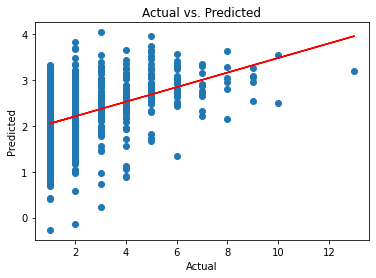

In [ ]:
# print a scatter plot of test values and predicted values
plt.scatter(y_test, y_pred)
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

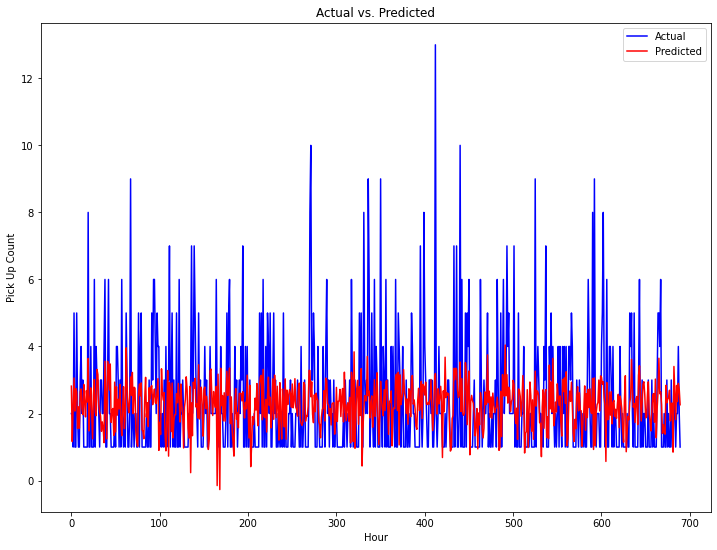

In [ ]:
# print actual vs predicted values over time
# indicates slight underfitting
x = range(len(y_test))
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(x, y_test, label='Actual', color='blue')
plt.plot(x, y_pred, label='Predicted', color='red')
plt.title('Actual vs. Predicted')
plt.xlabel('Hour')
plt.ylabel('Pick Up Count')
plt.legend()
plt.show()

In [ ]:
# Training MSE for linear regression
mse_train_1 = mean_squared_error(y_train, linear_regressor.predict(X_train))
print('Training MSE:', mse_train_1)

# Test MSE for linear regression
mse_test_1 = mean_squared_error(y_test, linear_regressor.predict(X_test))
print('Test MSE:', mse_test_1)


mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

Training MSE: 2.264432125298795
Test MSE: 2.64832853380216
MSE is 2.648


In [ ]:
# add 21st and I Linear Regression MSE values to table
I_MSEs.loc['MLR','PU'] = mse

In [ ]:
I_MSEs

,PU,DO
MLR,2.648,0
Polynomial,0.000,0
KNN,0.000,0
LASSO,0.000,0
Ridge Regression,0.000,0
Elastic Net,0.000,0


### Polynomial Model with different values of K

In [ ]:
# fit a polynomial regression model of varying orders of K (2 to 10)
k_value = [k for k in range(2, 10)]
MSE_train = []
MSE_test = []

x_train_extend = X_train
x_test_extend = X_test
    
for k in k_value:
    
    # Add x^k into the training and test data
    x_train_extend = np.concatenate((x_train_extend, X_train**k), axis=1)
    x_test_extend = np.concatenate((x_test_extend, X_test**k), axis=1)

    # Train the model using the training sets
    linear_regressor.fit(x_train_extend,y_train)

    # Record training MSE
    MSE_train.append(mean_squared_error(y_train, linear_regressor.predict(x_train_extend)))

    # Record test MSE
    MSE_test.append(mean_squared_error(y_test, linear_regressor.predict(x_test_extend)))    

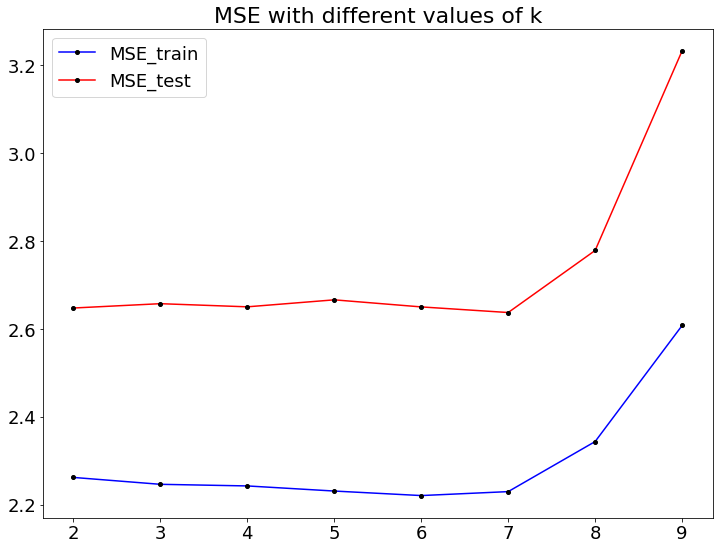

In [ ]:
import matplotlib.pyplot as plt
# plot the train and test MSE values for various orders of K
# select model with minimum test MSE
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(k_value, MSE_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'MSE_train')
plt.plot(k_value, MSE_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'MSE_test')
plt.legend(fontsize=18)
plt.title('MSE with different values of k', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [ ]:
MSE_test # min test mse is 2.63

[2.647601971777071,
 2.6574699981888257,
 2.6503159094167046,
 2.666216656750635,
 2.650119489227451,
 2.637333546036816,
 2.7786444856259074,
 3.233112548611393]

In [ ]:
I_MSEs.loc['Polynomial','PU'] = min(MSE_test) #add optimal mse value to dataframe

In [ ]:
I_MSEs

,PU,DO
MLR,2.648000,0
Polynomial,2.637334,0
KNN,0.000000,0
LASSO,0.000000,0
Ridge Regression,0.000000,0
Elastic Net,0.000000,0


### K-Nearest Neighbors

In [ ]:
# fit a KNN regression model for up to 30 nearest neighbors
mse_train = [-1]*30
mse_test = [-1]*30
for K in range(30):
    model = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model.fit(X_train,y_train)  #fit the model
    mse_train[K] = mean_squared_error(y_train, model.predict(X_train))
    mse_test[K] = mean_squared_error(y_test, model.predict(X_test)) 

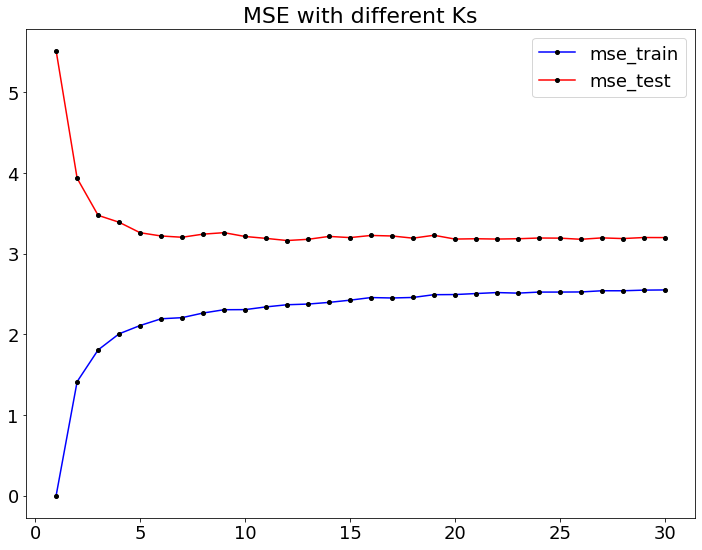

In [ ]:
# plot training and test mse for different values of K, select minimum test value to determine optimal k
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(np.arange(30)+1, mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(30)+1, mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=18)
plt.title('MSE with different Ks', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [ ]:
# optimal k (minimum test mse value)
np.argmin(mse_test)+1

12

In [ ]:
# optimal MSE
min(mse_test)

3.1629327697262477

In [ ]:
I_MSEs.loc['KNN','PU'] = min(mse_test) # add KNN mse score to dataframe

In [ ]:
I_MSEs

,PU,DO
MLR,2.648000,0
Polynomial,2.637334,0
KNN,3.162933,0
LASSO,0.000000,0
Ridge Regression,0.000000,0
Elastic Net,0.000000,0



### LASSO

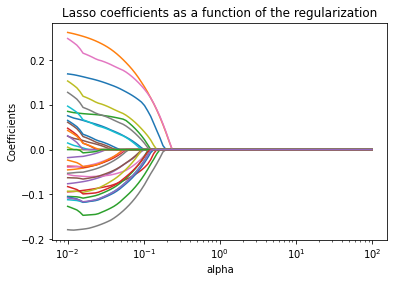

In [ ]:
# create a lasso model for pickups for 21st and I street
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [ ]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.02104904144512021


In [ ]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train.columns))

The coefficients are:
feelslike                0.157427
precip                  -0.036419
uvindex                  0.078637
ward2_accidents         -0.088126
seasons_Winter          -0.066953
day_of_week_Monday       0.014484
day_of_week_Saturday    -0.060089
day_of_week_Sunday      -0.173325
day_of_week_Thursday     0.000000
day_of_week_Tuesday      0.000000
day_of_week_Wednesday    0.059145
member_casual_member     0.245501
start_hour_1            -0.104295
start_hour_2            -0.036226
start_hour_3            -0.010566
start_hour_4            -0.062376
start_hour_5            -0.033519
start_hour_6            -0.045260
start_hour_7            -0.090294
start_hour_8            -0.113860
start_hour_9            -0.114786
start_hour_10           -0.035246
start_hour_11           -0.145063
start_hour_12            0.005416
start_hour_13            0.000000
start_hour_14            0.020634
start_hour_15            0.206173
start_hour_16            0.085298
start_hour_17            0

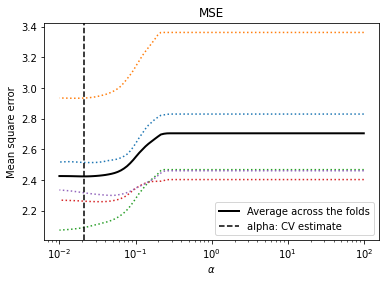

In [ ]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [ ]:
lasso.set_params(alpha=lassocv.alpha_)
y_pred=lasso.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 2.709


In [ ]:
I_MSEs.loc['LASSO','PU'] = mse

In [ ]:
I_MSEs

,PU,DO
MLR,2.648000,0
Polynomial,2.637334,0
KNN,3.162933,0
LASSO,2.709000,0
Ridge Regression,0.000000,0
Elastic Net,0.000000,0


### Ridge Regression

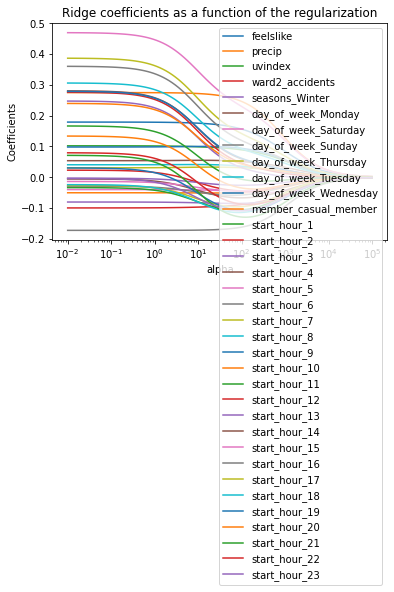

In [ ]:
# ridge regression model
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization');

In [ ]:
# standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [ ]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
feelslike                0.084293
precip                  -0.032436
uvindex                  0.053070
ward2_accidents         -0.055986
seasons_Winter          -0.059376
day_of_week_Monday       0.032152
day_of_week_Saturday    -0.044429
day_of_week_Sunday      -0.094480
day_of_week_Thursday     0.019609
day_of_week_Tuesday      0.017321
day_of_week_Wednesday    0.056060
member_casual_member     0.127606
start_hour_1            -0.058992
start_hour_2            -0.028827
start_hour_3            -0.016890
start_hour_4            -0.042785
start_hour_5            -0.025284
start_hour_6            -0.030376
start_hour_7            -0.050548
start_hour_8            -0.065912
start_hour_9            -0.066474
start_hour_10           -0.025476
start_hour_11           -0.080989
start_hour_12            0.012427
start_hour_13            0.002498
start_hour_14            0.024018
start_hour_15            0.119205
start_hour_16            0.055822
start_hour_17            0

In [ ]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 174.7528400007683


In [ ]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
feelslike                0.144583
precip                  -0.048898
uvindex                  0.083615
ward2_accidents         -0.084200
seasons_Winter          -0.083563
day_of_week_Monday       0.048028
day_of_week_Saturday    -0.049039
day_of_week_Sunday      -0.153821
day_of_week_Thursday     0.029207
day_of_week_Tuesday      0.032416
day_of_week_Wednesday    0.088659
member_casual_member     0.228485
start_hour_1            -0.101274
start_hour_2            -0.044111
start_hour_3            -0.025559
start_hour_4            -0.065332
start_hour_5            -0.042111
start_hour_6            -0.054496
start_hour_7            -0.090898
start_hour_8            -0.110214
start_hour_9            -0.105829
start_hour_10           -0.038180
start_hour_11           -0.128351
start_hour_12            0.034736
start_hour_13            0.021089
start_hour_14            0.048611
start_hour_15            0.208504
start_hour_16            0.104227
start_hour_17            0

In [ ]:
y_pred=ridge.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 2.699


In [ ]:
I_MSEs.loc['Ridge Regression','PU'] = mse

### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train), y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.000820491404159053


In [ ]:
# with the best alpha
EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train), y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))


The coefficients are:
feelslike                0.178428
precip                  -0.050319
uvindex                  0.100821
ward2_accidents         -0.099015
seasons_Winter          -0.080936
day_of_week_Monday       0.053302
day_of_week_Saturday    -0.040721
day_of_week_Sunday      -0.172848
day_of_week_Thursday     0.030209
day_of_week_Tuesday      0.039902
day_of_week_Wednesday    0.098014
member_casual_member     0.274321
start_hour_1            -0.050165
start_hour_2             0.008033
start_hour_3            -0.007832
start_hour_4            -0.018947
start_hour_5            -0.020648
start_hour_6            -0.035785
start_hour_7            -0.042242
start_hour_8            -0.044162
start_hour_9             0.000000
start_hour_10            0.098643
start_hour_11            0.027808
start_hour_12            0.230425
start_hour_13            0.204529
start_hour_14            0.236836
start_hour_15            0.425373
start_hour_16            0.313695
start_hour_17            0

In [ ]:
y_pred=EN.predict(scale(X_test.values))
I_bestPUmodel = y_pred
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 2.639


In [ ]:
I_MSEs.loc['Elastic Net','PU'] = mse

In [ ]:
en_i = EN.intercept_

## 21st and I - Dropoff Models

In [ ]:
# dropoff model for 21st and I (follow same procedure as above)
y = I_do['do_ct']
X = I_do.drop('do_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,feelslike,precip,uvindex,ward2_accidents,seasons_Winter,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,...,end_hour_14,end_hour_15,end_hour_16,end_hour_17,end_hour_18,end_hour_19,end_hour_20,end_hour_21,end_hour_22,end_hour_23
0,58.3,0.448,0,8,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,58.3,0.448,0,8,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,57.0,0.124,1,3,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57.0,0.124,1,3,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,57.0,0.124,1,3,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.columns

Index(['feelslike', 'precip', 'uvindex', 'ward2_accidents', 'seasons_Winter',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'member_casual_member', 'end_hour_1', 'end_hour_2', 'end_hour_3',
       'end_hour_4', 'end_hour_5', 'end_hour_6', 'end_hour_7', 'end_hour_8',
       'end_hour_9', 'end_hour_10', 'end_hour_11', 'end_hour_12',
       'end_hour_13', 'end_hour_14', 'end_hour_15', 'end_hour_16',
       'end_hour_17', 'end_hour_18', 'end_hour_19', 'end_hour_20',
       'end_hour_21', 'end_hour_22', 'end_hour_23'],
      dtype='object')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

In [ ]:
X_test2 = X_test

### Linear Regression

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train) 
y_pred = linear_regressor.predict(X_test)

In [ ]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X_train.columns))

feelslike                0.021441
precip                  -0.160711
uvindex                  0.056998
ward2_accidents         -0.031579
seasons_Winter           0.086724
day_of_week_Monday       0.564105
day_of_week_Saturday    -0.260898
day_of_week_Sunday      -0.437330
day_of_week_Thursday     0.220348
day_of_week_Tuesday      0.397507
day_of_week_Wednesday    0.289616
member_casual_member     1.007570
end_hour_1              -0.048057
end_hour_2              -0.092327
end_hour_3              -0.644696
end_hour_4              -0.850263
end_hour_5              -0.386302
end_hour_6              -1.232448
end_hour_7               0.106157
end_hour_8               1.253234
end_hour_9               1.869359
end_hour_10              0.872637
end_hour_11              0.203879
end_hour_12              0.217406
end_hour_13              0.207486
end_hour_14              0.221667
end_hour_15              0.106851
end_hour_16              0.174680
end_hour_17              0.409039
end_hour_18   

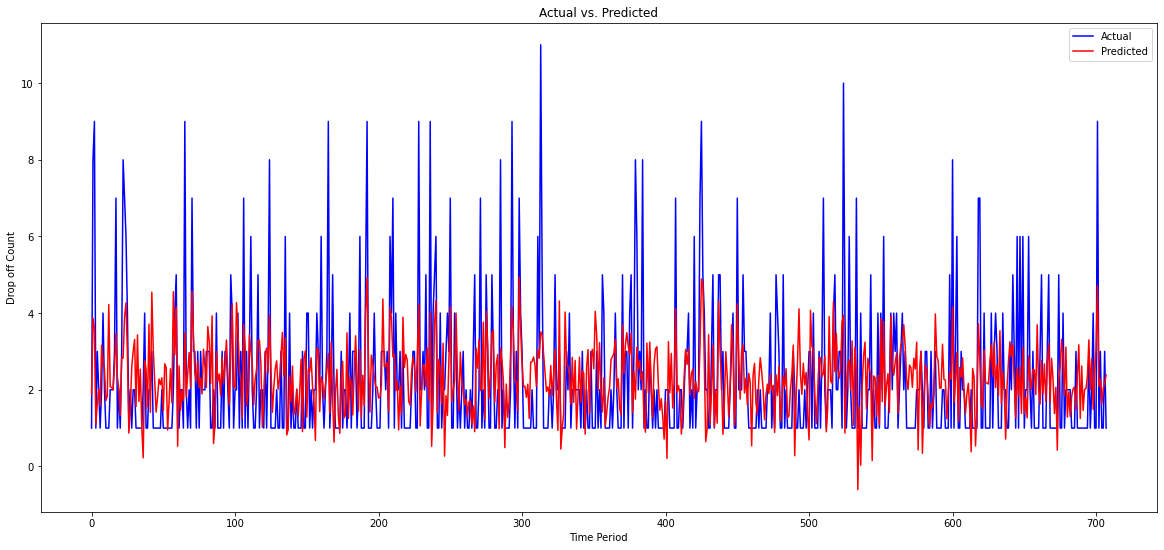

In [ ]:
x = range(len(y_test))

fig, ax1 = plt.subplots(figsize=(20, 9))
plt.plot(x, y_test, label='Actual', color='blue')
plt.plot(x, y_pred, label='Predicted', color='red')
plt.title('Actual vs. Predicted')
plt.xlabel('Time Period')
plt.ylabel('Drop off Count')
plt.legend()
plt.show()


In [ ]:
# Training MSE
mse_train_1 = mean_squared_error(y_train, linear_regressor.predict(X_train))
print('Training MSE:', mse_train_1)

# Test MSE
mse_test_1 = mean_squared_error(y_test, linear_regressor.predict(X_test))
print('Test MSE:', mse_test_1)


mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

Training MSE: 2.2197719814309425
Test MSE: 2.510123316457706
MSE is 2.51


In [ ]:
I_MSEs.loc['MLR','DO'] = mse

### Polynomial

In [ ]:
k_value = [k for k in range(2, 10)]
MSE_train = []
MSE_test = []

x_train_extend = X_train
x_test_extend = X_test
    
for k in k_value:
    
    # Add x^k into the training and test data
    x_train_extend = np.concatenate((x_train_extend, X_train**k), axis=1)
    x_test_extend = np.concatenate((x_test_extend, X_test**k), axis=1)

    # Train the model using the training sets
    linear_regressor.fit(x_train_extend,y_train)

    # Record training MSE
    MSE_train.append(mean_squared_error(y_train, linear_regressor.predict(x_train_extend)))

    # Record test MSE
    MSE_test.append(mean_squared_error(y_test, linear_regressor.predict(x_test_extend)))    

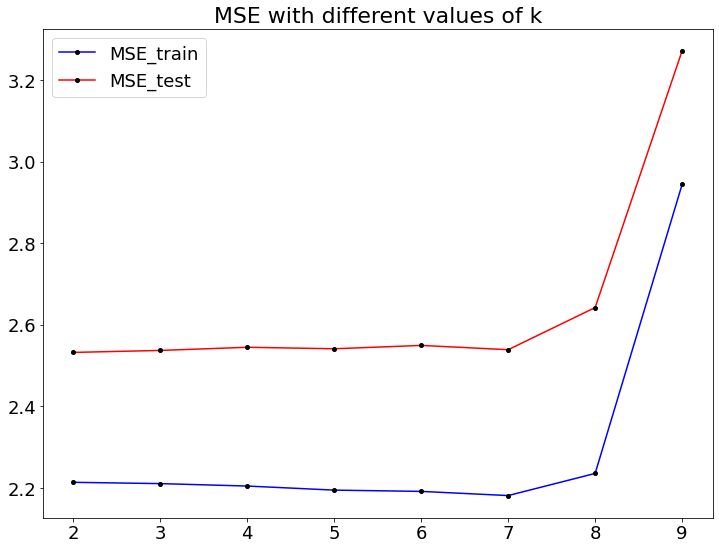

In [ ]:
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(k_value, MSE_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'MSE_train')
plt.plot(k_value, MSE_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'MSE_test')
plt.legend(fontsize=18)
plt.title('MSE with different values of k', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [ ]:
MSE_test

[2.5321588724999597,
 2.537016846936955,
 2.544738206570662,
 2.54109661043534,
 2.549299072985053,
 2.5388070921324535,
 2.642137688974101,
 3.2717455211005313]

In [ ]:
I_MSEs.loc['Polynomial','DO'] = min(MSE_test)

### K-Nearest Neighbors

In [ ]:
mse_train = [-1]*30
mse_test = [-1]*30
for K in range(30):
    model = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model.fit(X_train,y_train)  #fit the model
    mse_train[K] = mean_squared_error(y_train, model.predict(X_train))
    mse_test[K] = mean_squared_error(y_test, model.predict(X_test)) 

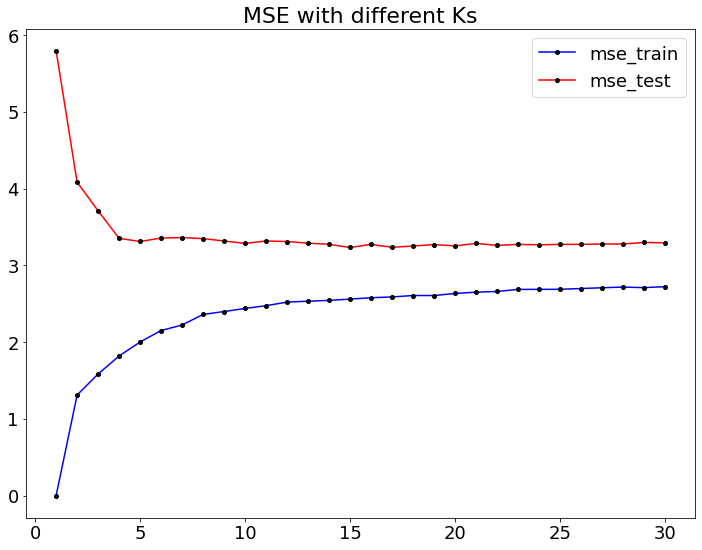

In [ ]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(np.arange(30)+1, mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(30)+1, mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=18)
plt.title('MSE with different Ks', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [ ]:
# optimal k
np.argmin(mse_test)+1

15

In [ ]:
# optimal MSE
min(mse_test)

3.232266164469554

In [ ]:
I_MSEs.loc['KNN','DO'] = min(mse_test)

### LASSO

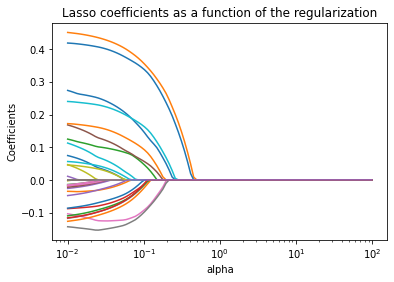

In [ ]:
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [ ]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.02104904144512021


In [ ]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train.columns))

The coefficients are:
feelslike                0.255192
precip                  -0.033414
uvindex                  0.105883
ward2_accidents         -0.082044
seasons_Winter           0.000000
day_of_week_Monday       0.138202
day_of_week_Saturday    -0.120158
day_of_week_Sunday      -0.151990
day_of_week_Thursday     0.010394
day_of_week_Tuesday      0.079400
day_of_week_Wednesday    0.046325
member_casual_member     0.439384
end_hour_1              -0.005504
end_hour_2              -0.009970
end_hour_3              -0.014781
end_hour_4              -0.011572
end_hour_5              -0.009113
end_hour_6              -0.102915
end_hour_7              -0.000000
end_hour_8               0.232112
end_hour_9               0.409903
end_hour_10              0.163782
end_hour_11              0.000000
end_hour_12              0.000000
end_hour_13              0.000000
end_hour_14              0.000000
end_hour_15             -0.004814
end_hour_16             -0.000000
end_hour_17              0

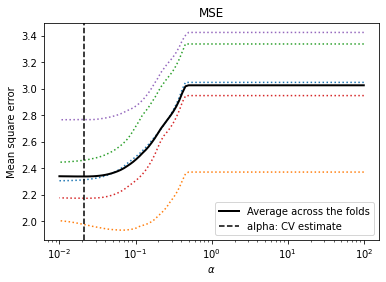

In [ ]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [ ]:
lasso.set_params(alpha=lassocv.alpha_)
y_pred=lasso.predict(scale(X_test.values))
I_bestDOmodel = y_pred
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 2.497


In [ ]:
I_MSEs.loc['LASSO','DO'] = mse

In [ ]:
lasso_i = lasso.intercept_

### Ridge Regression

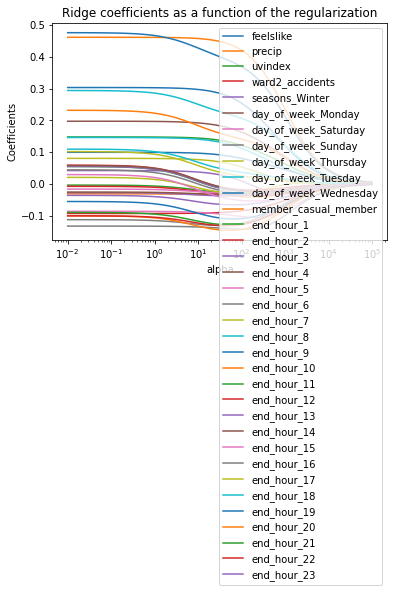

In [ ]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization');

In [ ]:
# standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [ ]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
feelslike                0.120026
precip                  -0.029389
uvindex                  0.062444
ward2_accidents         -0.052473
seasons_Winter          -0.030859
day_of_week_Monday       0.084817
day_of_week_Saturday    -0.084597
day_of_week_Sunday      -0.099529
day_of_week_Thursday     0.011629
day_of_week_Tuesday      0.049890
day_of_week_Wednesday    0.044418
member_casual_member     0.235223
end_hour_1              -0.028254
end_hour_2              -0.030466
end_hour_3              -0.024068
end_hour_4              -0.018995
end_hour_5              -0.022750
end_hour_6              -0.062314
end_hour_7              -0.002833
end_hour_8               0.120968
end_hour_9               0.212461
end_hour_10              0.081494
end_hour_11             -0.018485
end_hour_12             -0.012836
end_hour_13             -0.019002
end_hour_14             -0.020931
end_hour_15             -0.042807
end_hour_16             -0.024502
end_hour_17              0

In [ ]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 107.22672220103232


In [ ]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
feelslike                0.251123
precip                  -0.040937
uvindex                  0.119724
ward2_accidents         -0.084636
seasons_Winter           0.006991
day_of_week_Monday       0.160976
day_of_week_Saturday    -0.103599
day_of_week_Sunday      -0.143055
day_of_week_Thursday     0.051879
day_of_week_Tuesday      0.110067
day_of_week_Wednesday    0.078935
member_casual_member     0.418374
end_hour_1              -0.031475
end_hour_2              -0.035946
end_hour_3              -0.037143
end_hour_4              -0.032019
end_hour_5              -0.030424
end_hour_6              -0.123409
end_hour_7              -0.027598
end_hour_8               0.204523
end_hour_9               0.366175
end_hour_10              0.139501
end_hour_11             -0.023757
end_hour_12             -0.019730
end_hour_13             -0.023791
end_hour_14             -0.020969
end_hour_15             -0.052942
end_hour_16             -0.030790
end_hour_17              0

In [ ]:
y_pred=ridge.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 2.5


In [ ]:
I_MSEs.loc['Ridge Regression','DO'] = mse

### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train), y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.042856459581277345


In [ ]:
# with the best alpha
EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train), y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))


The coefficients are:
feelslike                0.248165
precip                  -0.032844
uvindex                  0.103109
ward2_accidents         -0.079745
seasons_Winter           0.000000
day_of_week_Monday       0.133562
day_of_week_Saturday    -0.120396
day_of_week_Sunday      -0.151096
day_of_week_Thursday     0.007480
day_of_week_Tuesday      0.075317
day_of_week_Wednesday    0.044055
member_casual_member     0.429345
end_hour_1              -0.006318
end_hour_2              -0.010771
end_hour_3              -0.014559
end_hour_4              -0.011121
end_hour_5              -0.009435
end_hour_6              -0.100104
end_hour_7              -0.000000
end_hour_8               0.226249
end_hour_9               0.400169
end_hour_10              0.158865
end_hour_11              0.000000
end_hour_12              0.000000
end_hour_13              0.000000
end_hour_14              0.000000
end_hour_15             -0.007016
end_hour_16             -0.000000
end_hour_17              0

In [ ]:
y_pred=EN.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 2.499


In [ ]:
I_MSEs.loc['Elastic Net','DO'] = mse

## Pickup and Dropoff Model Results

In [ ]:
I_MSEs # results for 2st and I location Pick up and Drop off MSE

,PU,DO
MLR,2.648000,2.510000
Polynomial,2.637334,2.532159
KNN,3.162933,3.232266
LASSO,2.709000,2.497000
Ridge Regression,2.699000,2.500000
Elastic Net,2.639000,2.499000


In [ ]:
print('The best pickup model is:',
      I_MSEs.loc[I_MSEs['PU'] == min(I_MSEs['PU']),'PU'])

The best pickup model is: Polynomial    2.637334
Name: PU, dtype: float64


In [ ]:
print('The best dropoff model is:',
      I_MSEs.loc[I_MSEs['DO'] == min(I_MSEs['DO']),'DO'])

The best dropoff model is: LASSO    2.497
Name: DO, dtype: float64


# 21st and Penn Ave

## PU & DO dataframes

In [ ]:
 #Counting daily pick ups for 21st and Penn Ave NW
df_sub2 = df[df['start_station_name']=="21st St & Pennsylvania Ave NW"]
df_grp2 = df_sub2.groupby(['started_at_date', 'start_station_name', 'seasons','day_of_week','holiday','member_casual', 'start_hour']).size()
df_pu2 = df_grp2.reset_index(name = 'pu_ct')
df_pu2['No. Docks'] = 9
df_pu2

,started_at_date,start_station_name,seasons,day_of_week,holiday,member_casual,start_hour,pu_ct,No. Docks
0,2022-01-01,21st St & Pennsylvania Ave NW,Winter,Saturday,False,casual,2,1,9
1,2022-01-01,21st St & Pennsylvania Ave NW,Winter,Saturday,False,casual,14,1,9
2,2022-01-01,21st St & Pennsylvania Ave NW,Winter,Saturday,False,casual,21,1,9
3,2022-01-01,21st St & Pennsylvania Ave NW,Winter,Saturday,False,casual,22,1,9
4,2022-01-01,21st St & Pennsylvania Ave NW,Winter,Saturday,False,member,17,1,9
...,...,...,...,...,...,...,...,...,...
896,2022-04-30,21st St & Pennsylvania Ave NW,Spring,Saturday,False,member,16,1,9
897,2022-04-30,21st St & Pennsylvania Ave NW,Spring,Saturday,False,member,20,1,9
898,2022-04-30,21st St & Pennsylvania Ave NW,Spring,Saturday,False,member,21,1,9
899,2022-04-30,21st St & Pennsylvania Ave NW,Spring,Saturday,False,member,22,1,9


In [ ]:
# Counting daily drop offs for 21st St & Penn Ave NW
df_sub4 = df[df['end_station_name']=="21st St & Pennsylvania Ave NW"]
df_grp4 = df_sub4.groupby(['ended_at_date', 'end_station_name', 'seasons','day_of_week','holiday','member_casual', 'end_hour']).size()
df_do2 = df_grp4.reset_index(name='do_ct')
df_do2

,ended_at_date,end_station_name,seasons,day_of_week,holiday,member_casual,end_hour,do_ct
0,2022-01-01,21st St & Pennsylvania Ave NW,Winter,Saturday,False,casual,2,1
1,2022-01-01,21st St & Pennsylvania Ave NW,Winter,Saturday,False,casual,20,1
2,2022-01-01,21st St & Pennsylvania Ave NW,Winter,Saturday,False,casual,21,2
3,2022-01-02,21st St & Pennsylvania Ave NW,Winter,Sunday,False,casual,15,1
4,2022-01-02,21st St & Pennsylvania Ave NW,Winter,Sunday,False,casual,18,2
...,...,...,...,...,...,...,...,...
1107,2022-04-30,21st St & Pennsylvania Ave NW,Spring,Saturday,False,member,0,2
1108,2022-04-30,21st St & Pennsylvania Ave NW,Spring,Saturday,False,member,9,1
1109,2022-04-30,21st St & Pennsylvania Ave NW,Spring,Saturday,False,member,10,1
1110,2022-04-30,21st St & Pennsylvania Ave NW,Spring,Saturday,False,member,17,1


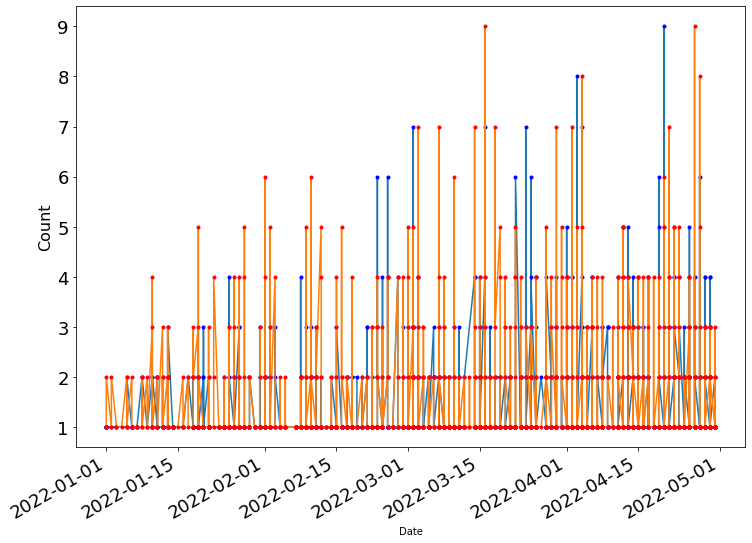

In [ ]:
# Plotting number of pick ups and drop offs for 21st and Penn Ave, pickups in blue, dropoffs in red
fig, ax1 = plt.subplots(figsize=(12, 9))
ax1.plot_date( df_pu2['started_at_date'], df_pu2['pu_ct'],linestyle = 'solid',markeredgecolor = 'blue',markerfacecolor = 'blue', markersize = 3)
ax1.plot_date( df_do2['ended_at_date'], df_do2['do_ct'],linestyle = 'solid',markeredgecolor = 'red',markerfacecolor = 'red', markersize = 3)

ax1.set_xlabel('Date',fontsize=10)
ax1.set_ylabel('Count',fontsize=16)
plt.gcf().autofmt_xdate()

plt.tick_params(labelsize=18)
plt.show()  

<Axes: >

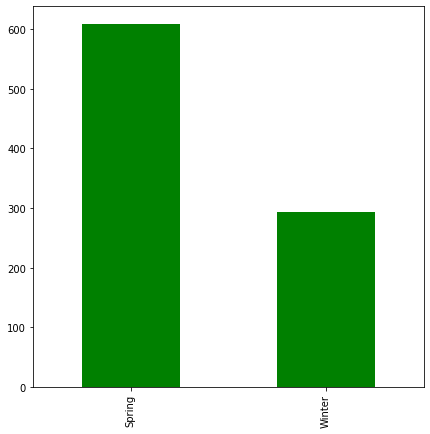

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
df_pu2['seasons'].value_counts().plot(ax=ax, kind='bar', color='green')
# plot usage by season

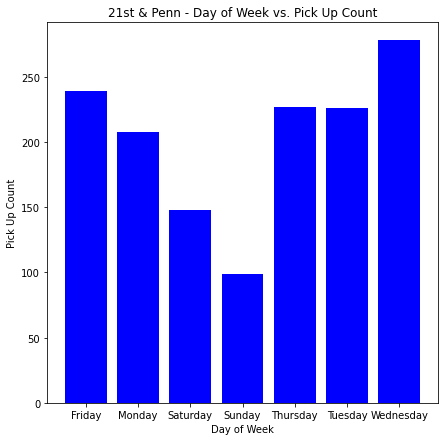

In [ ]:
# plot day of week vs pickup count for 21st and Penn
df_grouped_2 = df_pu2.groupby('day_of_week')['pu_ct'].sum().reset_index()

fig, ax = plt.subplots(figsize = (7,7))
plt.bar(df_grouped_2['day_of_week'], df_grouped_2['pu_ct'], color='blue')
plt.title('21st & Penn - Day of Week vs. Pick Up Count')
plt.xlabel('Day of Week')
plt.ylabel('Pick Up Count')
plt.show()


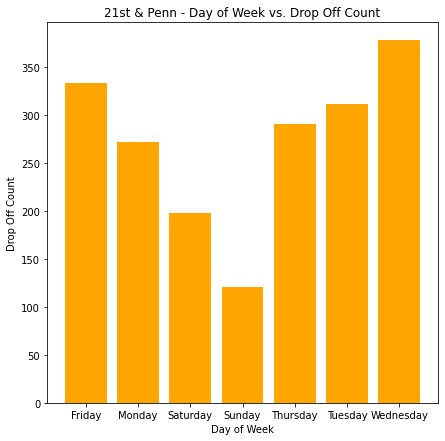

In [ ]:
#plot drop off count by day of week for 21st and Penn
df_grouped_2d = df_do2.groupby('day_of_week')['do_ct'].sum().reset_index()

fig, ax = plt.subplots(figsize = (7,7))
plt.bar(df_grouped_2d['day_of_week'], df_grouped_2d['do_ct'], color = 'orange')
plt.title('21st & Penn - Day of Week vs. Drop Off Count')
plt.xlabel('Day of Week')
plt.ylabel('Drop Off Count')
plt.show()

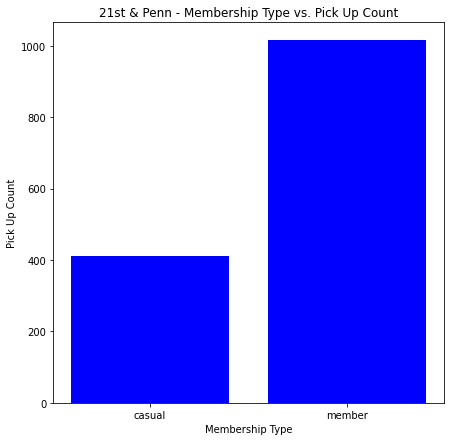

In [ ]:
# plot pickups for members vs casual members at 21st and Penn
df_grouped = df_pu2.groupby('member_casual')['pu_ct'].sum().reset_index()
fig, ax = plt.subplots(figsize = (7,7))
plt.bar(df_grouped['member_casual'], df_grouped['pu_ct'], color='blue')
plt.title('21st & Penn - Membership Type vs. Pick Up Count')
plt.xlabel('Membership Type')
plt.ylabel('Pick Up Count')
plt.show()

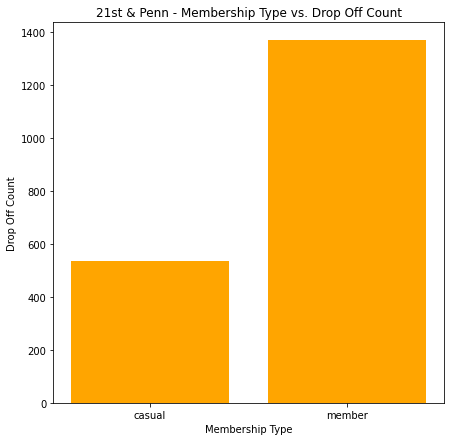

In [ ]:
# plot drop offs for members vs non members for 21st and Penn
df_grouped = df_do2.groupby('member_casual')['do_ct'].sum().reset_index()
fig, ax = plt.subplots(figsize = (7,7))
plt.bar(df_grouped['member_casual'], df_grouped['do_ct'], color='orange')
plt.title('21st & Penn - Membership Type vs. Drop Off Count')
plt.xlabel('Membership Type')
plt.ylabel('Drop Off Count')
plt.show() 

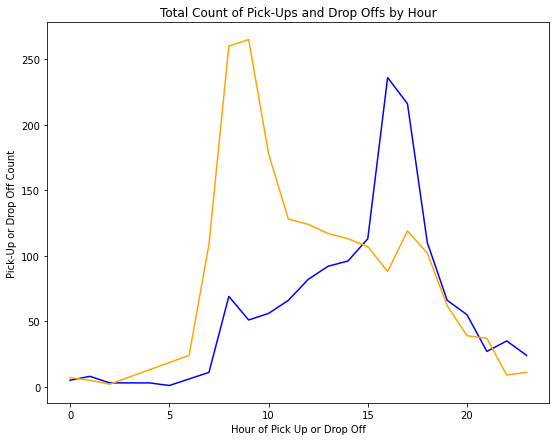

In [ ]:
# plot count of pickups or drop offs by hour of day for 21st and Penn (pickups in blue, drop offs in orange)
df_grouped = df_pu2.groupby('start_hour')['pu_ct'].sum().reset_index()
df_grouped2 = df_do2.groupby('end_hour')['do_ct'].sum().reset_index()
fig, ax = plt.subplots(figsize=(9, 7))
plt.plot(df_grouped['start_hour'], df_grouped['pu_ct'], color='blue')
plt.plot(df_grouped2['end_hour'], df_grouped2['do_ct'], color='orange')
plt.title('Total Count of Pick-Ups and Drop Offs by Hour')
plt.xlabel('Hour of Pick Up or Drop Off')
plt.ylabel('Pick-Up or Drop Off Count')
plt.show()

array([[<Axes: title={'center': 'started_at_date'}>,
        <Axes: title={'center': 'start_hour'}>],
       [<Axes: title={'center': 'pu_ct'}>,
        <Axes: title={'center': 'No. Docks'}>]], dtype=object)

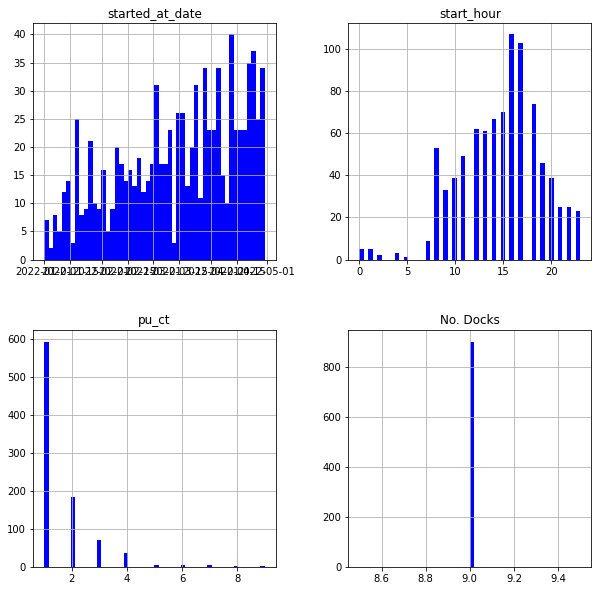

In [ ]:
# plot histograms for 21st and Penn for counts of date, hour of day and size of pickup per hour
df_pu2[df_pu2.columns].hist(bins=50, color = 'blue', figsize=(10, 10))

array([[<Axes: title={'center': 'ended_at_date'}>,
        <Axes: title={'center': 'end_hour'}>],
       [<Axes: title={'center': 'do_ct'}>, <Axes: >]], dtype=object)

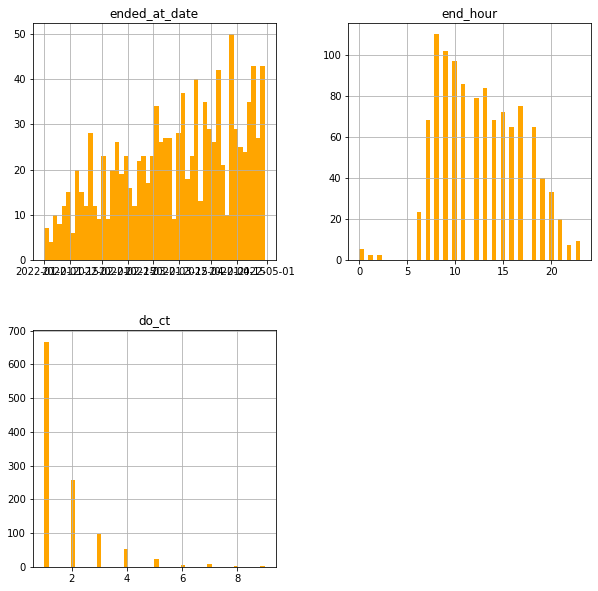

In [ ]:
# plot same histograms for drop off
df_do2[df_do2.columns].hist(bins=50, color='orange', figsize=(10, 10))

### Merging of datasets - Bikeshare & Weather

In [ ]:
# merge together weather data and pickup data on start date and datetime for 21st and Penn
df_P_pu = df_pu2.merge(df_weather, left_on='started_at_date', right_on='datetime') 

In [ ]:
df_P_pu

,started_at_date,start_station_name,seasons,day_of_week,holiday,member_casual,start_hour,pu_ct,No. Docks,datetime,...,humidity,precip,preciptype,snow,windspeed,cloudcover,visibility,uvindex,conditions,icon
0,2022-01-01,21st St & Pennsylvania Ave NW,Winter,Saturday,False,casual,2,1,9,2022-01-01,...,92.1,0.448,rain,0.0,11.4,99.5,6.2,0,"Rain, Overcast",rain
1,2022-01-01,21st St & Pennsylvania Ave NW,Winter,Saturday,False,casual,14,1,9,2022-01-01,...,92.1,0.448,rain,0.0,11.4,99.5,6.2,0,"Rain, Overcast",rain
2,2022-01-01,21st St & Pennsylvania Ave NW,Winter,Saturday,False,casual,21,1,9,2022-01-01,...,92.1,0.448,rain,0.0,11.4,99.5,6.2,0,"Rain, Overcast",rain
3,2022-01-01,21st St & Pennsylvania Ave NW,Winter,Saturday,False,casual,22,1,9,2022-01-01,...,92.1,0.448,rain,0.0,11.4,99.5,6.2,0,"Rain, Overcast",rain
4,2022-01-01,21st St & Pennsylvania Ave NW,Winter,Saturday,False,member,17,1,9,2022-01-01,...,92.1,0.448,rain,0.0,11.4,99.5,6.2,0,"Rain, Overcast",rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,2022-04-30,21st St & Pennsylvania Ave NW,Spring,Saturday,False,member,16,1,9,2022-04-30,...,36.2,0.000,NaN,0.0,9.9,63.1,9.9,7,Partially cloudy,partly-cloudy-day
897,2022-04-30,21st St & Pennsylvania Ave NW,Spring,Saturday,False,member,20,1,9,2022-04-30,...,36.2,0.000,NaN,0.0,9.9,63.1,9.9,7,Partially cloudy,partly-cloudy-day
898,2022-04-30,21st St & Pennsylvania Ave NW,Spring,Saturday,False,member,21,1,9,2022-04-30,...,36.2,0.000,NaN,0.0,9.9,63.1,9.9,7,Partially cloudy,partly-cloudy-day
899,2022-04-30,21st St & Pennsylvania Ave NW,Spring,Saturday,False,member,22,1,9,2022-04-30,...,36.2,0.000,NaN,0.0,9.9,63.1,9.9,7,Partially cloudy,partly-cloudy-day


In [ ]:
# merge together drop off bikeshare data on end date and datetime
df_P_do = df_do2.merge(df_weather, left_on='ended_at_date', right_on='datetime') 

In [ ]:
df_P_do

,ended_at_date,end_station_name,seasons,day_of_week,holiday,member_casual,end_hour,do_ct,datetime,temp,...,humidity,precip,preciptype,snow,windspeed,cloudcover,visibility,uvindex,conditions,icon
0,2022-01-01,21st St & Pennsylvania Ave NW,Winter,Saturday,False,casual,2,1,2022-01-01,58.3,...,92.1,0.448,rain,0.0,11.4,99.5,6.2,0,"Rain, Overcast",rain
1,2022-01-01,21st St & Pennsylvania Ave NW,Winter,Saturday,False,casual,20,1,2022-01-01,58.3,...,92.1,0.448,rain,0.0,11.4,99.5,6.2,0,"Rain, Overcast",rain
2,2022-01-01,21st St & Pennsylvania Ave NW,Winter,Saturday,False,casual,21,2,2022-01-01,58.3,...,92.1,0.448,rain,0.0,11.4,99.5,6.2,0,"Rain, Overcast",rain
3,2022-01-02,21st St & Pennsylvania Ave NW,Winter,Sunday,False,casual,15,1,2022-01-02,57.5,...,81.6,0.124,rain,0.0,18.9,91.6,9.6,1,"Rain, Overcast",rain
4,2022-01-02,21st St & Pennsylvania Ave NW,Winter,Sunday,False,casual,18,2,2022-01-02,57.5,...,81.6,0.124,rain,0.0,18.9,91.6,9.6,1,"Rain, Overcast",rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,2022-04-30,21st St & Pennsylvania Ave NW,Spring,Saturday,False,member,0,2,2022-04-30,56.5,...,36.2,0.000,NaN,0.0,9.9,63.1,9.9,7,Partially cloudy,partly-cloudy-day
1108,2022-04-30,21st St & Pennsylvania Ave NW,Spring,Saturday,False,member,9,1,2022-04-30,56.5,...,36.2,0.000,NaN,0.0,9.9,63.1,9.9,7,Partially cloudy,partly-cloudy-day
1109,2022-04-30,21st St & Pennsylvania Ave NW,Spring,Saturday,False,member,10,1,2022-04-30,56.5,...,36.2,0.000,NaN,0.0,9.9,63.1,9.9,7,Partially cloudy,partly-cloudy-day
1110,2022-04-30,21st St & Pennsylvania Ave NW,Spring,Saturday,False,member,17,1,2022-04-30,56.5,...,36.2,0.000,NaN,0.0,9.9,63.1,9.9,7,Partially cloudy,partly-cloudy-day


### Merging of datasets - Bikeshare/Weather & Crashes

In [ ]:
# merge togther data with crashes data on start and end date and from date
P_pu = df_P_pu.merge(df_crashes2, left_on='started_at_date', right_on='FROMDATE') 
P_do = df_P_do.merge(df_crashes2, left_on='ended_at_date', right_on='FROMDATE') 

In [ ]:
# Removing date and station names
P_pu = P_pu.drop(columns=['started_at_date','start_station_name','datetime','FROMDATE', 'temp', 'preciptype', 'snow', 'windspeed', 'cloudcover', 'visibility', 'conditions', 'icon', 'holiday'])
P_do = P_do.drop(columns=['ended_at_date','end_station_name','datetime','FROMDATE', 'temp', 'preciptype', 'snow', 'windspeed', 'cloudcover', 'visibility', 'conditions', 'icon', 'holiday'])

In [ ]:
P_pu = P_pu.drop(columns=['No. Docks']) # drop unneccessary columns

In [ ]:
P_pu = P_pu.drop(columns=['humidity'])
P_do = P_do.drop(columns=['humidity'])

In [ ]:
P_pu

,seasons,day_of_week,member_casual,start_hour,pu_ct,feelslike,precip,uvindex,ward2_accidents
0,Winter,Saturday,casual,2,1,58.3,0.448,0,8
1,Winter,Saturday,casual,14,1,58.3,0.448,0,8
2,Winter,Saturday,casual,21,1,58.3,0.448,0,8
3,Winter,Saturday,casual,22,1,58.3,0.448,0,8
4,Winter,Saturday,member,17,1,58.3,0.448,0,8
...,...,...,...,...,...,...,...,...,...
896,Spring,Saturday,member,16,1,55.7,0.000,7,13
897,Spring,Saturday,member,20,1,55.7,0.000,7,13
898,Spring,Saturday,member,21,1,55.7,0.000,7,13
899,Spring,Saturday,member,22,1,55.7,0.000,7,13


In [ ]:
P_do

,seasons,day_of_week,member_casual,end_hour,do_ct,feelslike,precip,uvindex,ward2_accidents
0,Winter,Saturday,casual,2,1,58.3,0.448,0,8
1,Winter,Saturday,casual,20,1,58.3,0.448,0,8
2,Winter,Saturday,casual,21,2,58.3,0.448,0,8
3,Winter,Sunday,casual,15,1,57.0,0.124,1,3
4,Winter,Sunday,casual,18,2,57.0,0.124,1,3
...,...,...,...,...,...,...,...,...,...
1104,Spring,Saturday,member,0,2,55.7,0.000,7,13
1105,Spring,Saturday,member,9,1,55.7,0.000,7,13
1106,Spring,Saturday,member,10,1,55.7,0.000,7,13
1107,Spring,Saturday,member,17,1,55.7,0.000,7,13


In [ ]:
# convert hours into an object variable to be used as a factor in subsequent analysis
P_pu['start_hour'] = P_pu['start_hour'].astype("object")

In [ ]:
P_do['end_hour'] = P_do['end_hour'].astype("object")

In [ ]:
# create empty data frame to store MSE values for each regression method
P_MSEs = pd.DataFrame({"PU": [0,0,0,0,0,0],
 
                   "DO": [0,0,0,0,0,0]},
 
                  index=["MLR","Polynomial","KNN","LASSO","Ridge Regression","Elastic Net"])

In [ ]:
P_MSEs

,PU,DO
MLR,0,0
Polynomial,0,0
KNN,0,0
LASSO,0,0
Ridge Regression,0,0
Elastic Net,0,0


## 21st and Penn - Pickup Models

In [ ]:
# Pickup model data
# obtain dummies for analysis
y = P_pu['pu_ct']
X = P_pu.drop('pu_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,feelslike,precip,uvindex,ward2_accidents,seasons_Winter,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,...,start_hour_14,start_hour_15,start_hour_16,start_hour_17,start_hour_18,start_hour_19,start_hour_20,start_hour_21,start_hour_22,start_hour_23
0,58.3,0.448,0,8,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,58.3,0.448,0,8,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,58.3,0.448,0,8,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,58.3,0.448,0,8,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,58.3,0.448,0,8,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X.columns

Index(['feelslike', 'precip', 'uvindex', 'ward2_accidents', 'seasons_Winter',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'member_casual_member', 'start_hour_1', 'start_hour_2', 'start_hour_4',
       'start_hour_5', 'start_hour_7', 'start_hour_8', 'start_hour_9',
       'start_hour_10', 'start_hour_11', 'start_hour_12', 'start_hour_13',
       'start_hour_14', 'start_hour_15', 'start_hour_16', 'start_hour_17',
       'start_hour_18', 'start_hour_19', 'start_hour_20', 'start_hour_21',
       'start_hour_22', 'start_hour_23'],
      dtype='object')

In [ ]:
#create training and testing data for pickup for 21st and Penn 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

In [ ]:
X_test3 = X_test

### Linear Regression

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train) 
y_pred = linear_regressor.predict(X_test)

In [ ]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X_train.columns))

feelslike                0.001841
precip                  -0.250549
uvindex                  0.005712
ward2_accidents          0.003940
seasons_Winter          -0.372084
day_of_week_Monday      -0.015097
day_of_week_Saturday     0.116157
day_of_week_Sunday      -0.329583
day_of_week_Thursday    -0.033464
day_of_week_Tuesday      0.054896
day_of_week_Wednesday    0.059602
member_casual_member     0.154780
start_hour_1             0.274831
start_hour_2            -0.043787
start_hour_4            -0.366030
start_hour_5            -0.443640
start_hour_7            -0.087563
start_hour_8            -0.193024
start_hour_9            -0.434292
start_hour_10           -0.109107
start_hour_11           -0.198293
start_hour_12           -0.143594
start_hour_13           -0.046202
start_hour_14           -0.220267
start_hour_15            0.099702
start_hour_16            0.634882
start_hour_17            0.479720
start_hour_18           -0.004645
start_hour_19           -0.179199
start_hour_20 

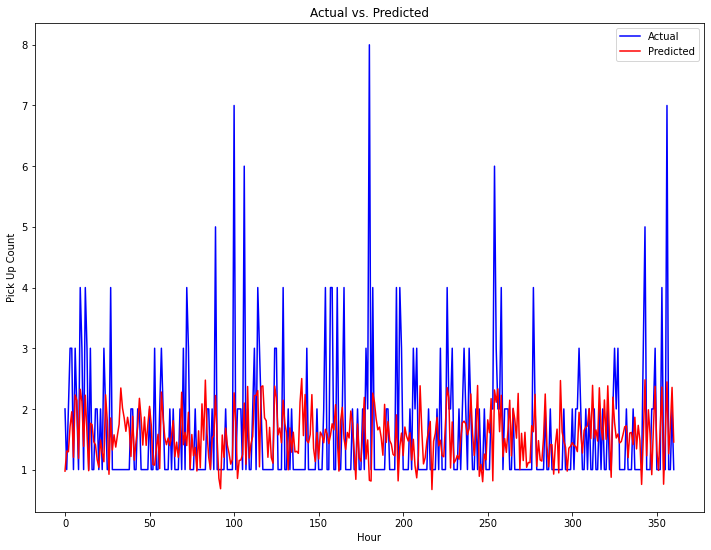

In [ ]:
# plot actual vs predicted values
x = range(len(y_test))
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(x, y_test, label='Actual', color='blue')
plt.plot(x, y_pred, label='Predicted', color='red')
plt.title('Actual vs. Predicted')
plt.xlabel('Hour')
plt.ylabel('Pick Up Count')
plt.legend()
plt.show()

In [ ]:
# Training MSE
mse_train_1 = mean_squared_error(y_train, linear_regressor.predict(X_train))
print('Training MSE:', mse_train_1)

# Test MSE
mse_test_1 = mean_squared_error(y_test, linear_regressor.predict(X_test))
print('Test MSE:', mse_test_1)


mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

Training MSE: 0.8786029311130029
Test MSE: 1.0530320930356116
MSE is 1.053


In [ ]:
P_MSEs.loc['MLR','PU'] = mse # add mse value to data frame for Penn

In [ ]:
P_MSEs

,PU,DO
MLR,1.053,0
Polynomial,0.000,0
KNN,0.000,0
LASSO,0.000,0
Ridge Regression,0.000,0
Elastic Net,0.000,0


### Polynomial Model with different Ks

In [ ]:
k_value = [k for k in range(2, 10)]
MSE_train = []
MSE_test = []

x_train_extend = X_train
x_test_extend = X_test
    
for k in k_value:
    
    # Add x^k into the training and test data
    x_train_extend = np.concatenate((x_train_extend, X_train**k), axis=1)
    x_test_extend = np.concatenate((x_test_extend, X_test**k), axis=1)

    # Train the model using the training sets
    linear_regressor.fit(x_train_extend,y_train)

    # Record training MSE
    MSE_train.append(mean_squared_error(y_train, linear_regressor.predict(x_train_extend)))

    # Record test MSE
    MSE_test.append(mean_squared_error(y_test, linear_regressor.predict(x_test_extend)))    

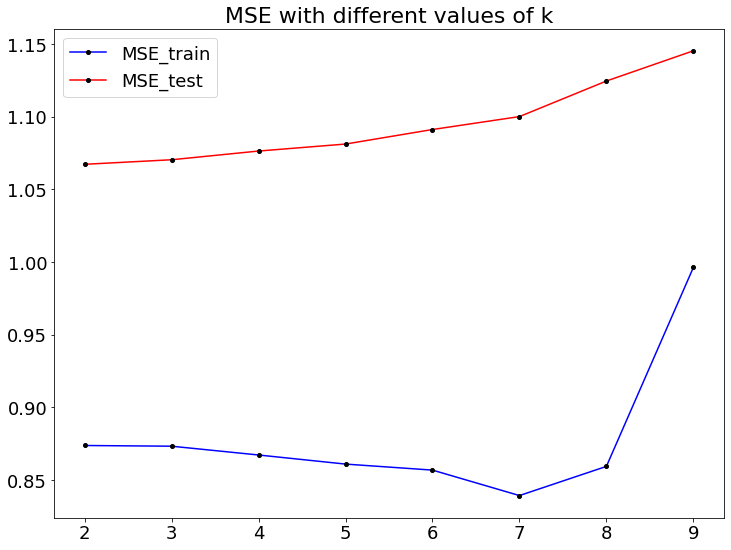

In [ ]:
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(k_value, MSE_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'MSE_train')
plt.plot(k_value, MSE_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'MSE_test')
plt.legend(fontsize=18)
plt.title('MSE with different values of k', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [ ]:
MSE_test

[1.0672004329693223,
 1.070326433017824,
 1.0763182614000506,
 1.0811295259770475,
 1.0911305732351118,
 1.100023003059939,
 1.1244914767915157,
 1.1452855547788654]

In [ ]:
P_MSEs.loc['Polynomial','PU'] = min(MSE_test) # add minimum test mse value to dataframe (order 2)

### K-Nearest Neighbors

In [ ]:
mse_train = [-1]*30
mse_test = [-1]*30
for K in range(30):
    model = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model.fit(X_train,y_train)  #fit the model
    mse_train[K] = mean_squared_error(y_train, model.predict(X_train))
    mse_test[K] = mean_squared_error(y_test, model.predict(X_test)) 

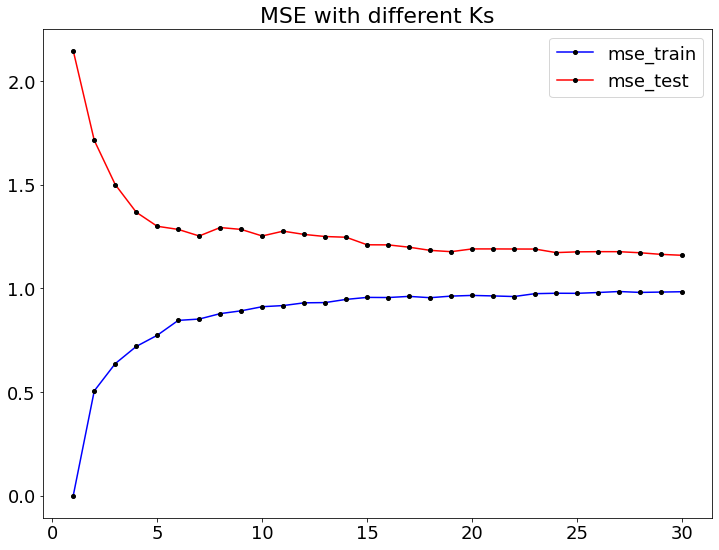

In [ ]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(np.arange(30)+1, mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(30)+1, mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=18)
plt.title('MSE with different Ks', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [ ]:
# optimal k
np.argmin(mse_test)+1

30

In [ ]:
# optimal MSE
min(mse_test)

1.159763004001231

In [ ]:
P_MSEs.loc['KNN','PU'] = min(mse_test)

### LASSO

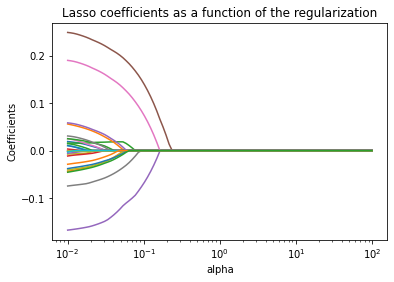

In [ ]:
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [ ]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.033516026509388425


In [ ]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train.columns))

The coefficients are:
feelslike                0.000000
precip                  -0.020750
uvindex                  0.018123
ward2_accidents          0.000000
seasons_Winter          -0.145459
day_of_week_Monday      -0.000000
day_of_week_Saturday     0.000000
day_of_week_Sunday      -0.054881
day_of_week_Thursday    -0.000000
day_of_week_Tuesday      0.000000
day_of_week_Wednesday    0.000000
member_casual_member     0.025557
start_hour_1             0.007038
start_hour_2             0.000000
start_hour_4            -0.000000
start_hour_5            -0.000000
start_hour_7            -0.000000
start_hour_8            -0.000000
start_hour_9            -0.020974
start_hour_10            0.000000
start_hour_11           -0.000000
start_hour_12           -0.000000
start_hour_13            0.000000
start_hour_14           -0.000000
start_hour_15            0.030138
start_hour_16            0.217315
start_hour_17            0.156693
start_hour_18            0.003427
start_hour_19           -0

In [ ]:
Lasso_P_Intercept = lasso.intercept_

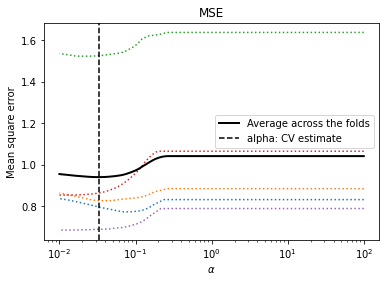

In [ ]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [ ]:
lasso.set_params(alpha=lassocv.alpha_)
y_pred=lasso.predict(scale(X_test.values))
P_bestPUmodel = y_pred
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 1.038


In [ ]:
P_MSEs.loc['LASSO','PU'] = mse

In [ ]:
lasso_p = lasso.intercept_

### Ridge Regression

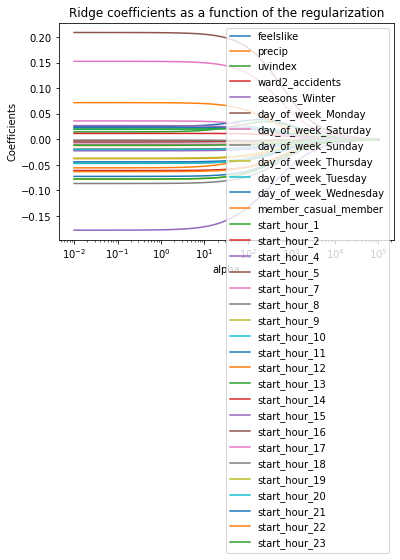

In [ ]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization');

In [ ]:
# standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [ ]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
feelslike                0.026963
precip                  -0.015730
uvindex                  0.025578
ward2_accidents          0.005422
seasons_Winter          -0.051556
day_of_week_Monday      -0.002944
day_of_week_Saturday     0.005488
day_of_week_Sunday      -0.031077
day_of_week_Thursday    -0.002962
day_of_week_Tuesday      0.012833
day_of_week_Wednesday    0.009371
member_casual_member     0.017822
start_hour_1             0.010988
start_hour_2            -0.000865
start_hour_4            -0.009421
start_hour_5            -0.007007
start_hour_7            -0.006358
start_hour_8            -0.017573
start_hour_9            -0.025243
start_hour_10           -0.007065
start_hour_11           -0.017051
start_hour_12           -0.014842
start_hour_13           -0.005332
start_hour_14           -0.023858
start_hour_15            0.008875
start_hour_16            0.077816
start_hour_17            0.053900
start_hour_18           -0.001039
start_hour_19           -0

In [ ]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 242.01282647943833


In [ ]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
feelslike                0.038685
precip                  -0.028457
uvindex                  0.034362
ward2_accidents          0.009416
seasons_Winter          -0.102766
day_of_week_Monday      -0.003807
day_of_week_Saturday     0.018245
day_of_week_Sunday      -0.059830
day_of_week_Thursday    -0.005412
day_of_week_Tuesday      0.021667
day_of_week_Wednesday    0.016921
member_casual_member     0.042568
start_hour_1             0.018474
start_hour_2            -0.002109
start_hour_4            -0.016315
start_hour_5            -0.012962
start_hour_7            -0.009556
start_hour_8            -0.033345
start_hour_9            -0.051805
start_hour_10           -0.014144
start_hour_11           -0.031760
start_hour_12           -0.026886
start_hour_13           -0.008893
start_hour_14           -0.045070
start_hour_15            0.017383
start_hour_16            0.148698
start_hour_17            0.105559
start_hour_18           -0.001968
start_hour_19           -0

In [ ]:
y_pred=ridge.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 1.044


In [ ]:
P_MSEs.loc['Ridge Regression','PU'] = mse

### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train), y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.056469737846624284


In [ ]:
# with the best alpha
EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train), y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))


The coefficients are:
feelslike                0.006952
precip                  -0.023002
uvindex                  0.020089
ward2_accidents          0.000000
seasons_Winter          -0.143033
day_of_week_Monday      -0.000000
day_of_week_Saturday     0.002116
day_of_week_Sunday      -0.058301
day_of_week_Thursday    -0.000000
day_of_week_Tuesday      0.000000
day_of_week_Wednesday    0.000000
member_casual_member     0.030717
start_hour_1             0.011009
start_hour_2             0.000000
start_hour_4            -0.000000
start_hour_5            -0.000000
start_hour_7            -0.000000
start_hour_8            -0.000000
start_hour_9            -0.026056
start_hour_10            0.000000
start_hour_11           -0.000000
start_hour_12           -0.000000
start_hour_13            0.000000
start_hour_14           -0.003530
start_hour_15            0.033064
start_hour_16            0.216154
start_hour_17            0.157261
start_hour_18            0.007202
start_hour_19           -0

In [ ]:
y_pred=EN.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 1.039


In [ ]:
P_MSEs.loc['Elastic Net','PU'] = mse

In [ ]:
EN_I_PU_Intercept = EN.intercept_

## 21st & Penn - Dropoff Models

In [ ]:
# dropoff dummies for 21st and Penn
y = P_do['do_ct']
X = P_do.drop('do_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,feelslike,precip,uvindex,ward2_accidents,seasons_Winter,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,...,end_hour_14,end_hour_15,end_hour_16,end_hour_17,end_hour_18,end_hour_19,end_hour_20,end_hour_21,end_hour_22,end_hour_23
0,58.3,0.448,0,8,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,58.3,0.448,0,8,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,58.3,0.448,0,8,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,57.0,0.124,1,3,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,57.0,0.124,1,3,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X.columns

Index(['feelslike', 'precip', 'uvindex', 'ward2_accidents', 'seasons_Winter',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'member_casual_member', 'end_hour_1', 'end_hour_2', 'end_hour_6',
       'end_hour_7', 'end_hour_8', 'end_hour_9', 'end_hour_10', 'end_hour_11',
       'end_hour_12', 'end_hour_13', 'end_hour_14', 'end_hour_15',
       'end_hour_16', 'end_hour_17', 'end_hour_18', 'end_hour_19',
       'end_hour_20', 'end_hour_21', 'end_hour_22', 'end_hour_23'],
      dtype='object')

In [ ]:
# split training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

In [ ]:
X_test4 = X_test

### Linear Regression

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train) 
y_pred = linear_regressor.predict(X_test)

In [ ]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X_train.columns))

feelslike                0.008764
precip                  -0.083234
uvindex                  0.006909
ward2_accidents         -0.006933
seasons_Winter          -0.209891
day_of_week_Monday      -0.000684
day_of_week_Saturday     0.202835
day_of_week_Sunday       0.073151
day_of_week_Thursday     0.053280
day_of_week_Tuesday     -0.004897
day_of_week_Wednesday    0.099698
member_casual_member     0.235313
end_hour_1              -0.427787
end_hour_2              -0.286286
end_hour_6              -0.269487
end_hour_7               0.410583
end_hour_8               1.063926
end_hour_9               1.187246
end_hour_10              0.468466
end_hour_11              0.232667
end_hour_12              0.366507
end_hour_13              0.086730
end_hour_14              0.142498
end_hour_15              0.064212
end_hour_16              0.086442
end_hour_17              0.233085
end_hour_18              0.284241
end_hour_19              0.046599
end_hour_20             -0.143551
end_hour_21   

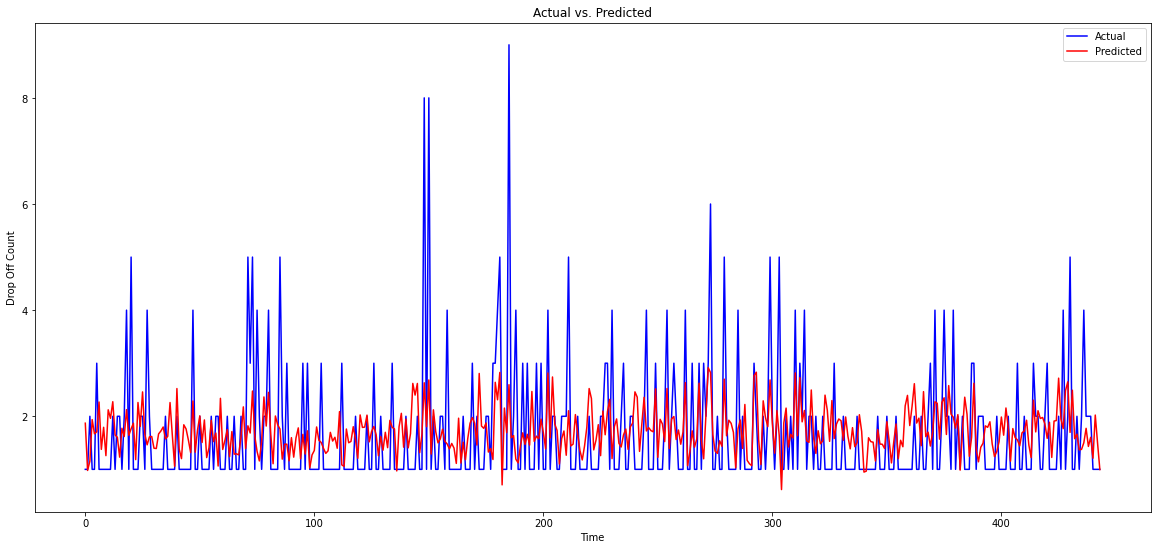

In [ ]:
x = range(len(y_test))
fig, ax1 = plt.subplots(figsize=(20, 9))
plt.plot(x, y_test, label='Actual', color='blue')
plt.plot(x, y_pred, label='Predicted', color='red')
plt.title('Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Drop Off Count')
plt.legend()
plt.show()

In [ ]:
# Training MSE
mse_train_1 = mean_squared_error(y_train, linear_regressor.predict(X_train))
print('Training MSE:', mse_train_1)

# Test MSE
mse_test_1 = mean_squared_error(y_test, linear_regressor.predict(X_test))
print('Test MSE:', mse_test_1)


mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

Training MSE: 1.1654851176722212
Test MSE: 1.1208286131926168
MSE is 1.121


In [ ]:
P_MSEs.loc['MLR','DO'] = mse

### Polynomial Model with different Ks

In [ ]:
k_value = [k for k in range(2, 10)]
MSE_train = []
MSE_test = []

x_train_extend = X_train
x_test_extend = X_test
    
for k in k_value:
    
    # Add x^k into the training and test data
    x_train_extend = np.concatenate((x_train_extend, X_train**k), axis=1)
    x_test_extend = np.concatenate((x_test_extend, X_test**k), axis=1)

    # Train the model using the training sets
    linear_regressor.fit(x_train_extend,y_train)

    # Record training MSE
    MSE_train.append(mean_squared_error(y_train, linear_regressor.predict(x_train_extend)))

    # Record test MSE
    MSE_test.append(mean_squared_error(y_test, linear_regressor.predict(x_test_extend)))    

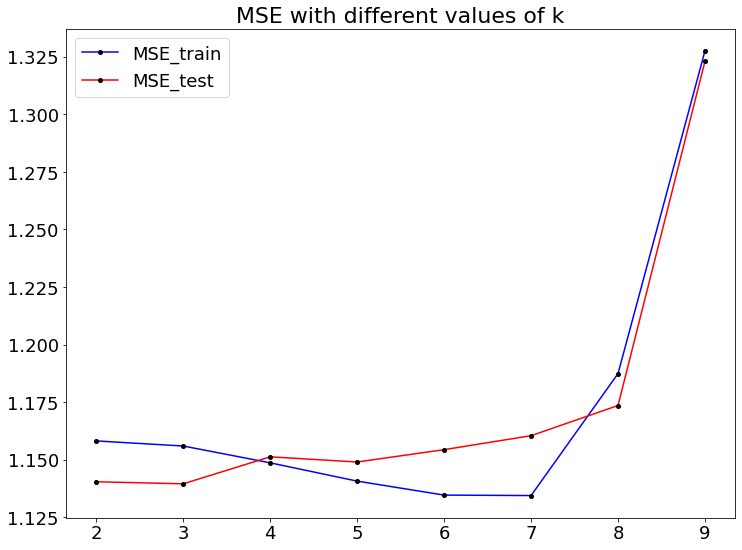

In [ ]:
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(k_value, MSE_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'MSE_train')
plt.plot(k_value, MSE_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'MSE_test')
plt.legend(fontsize=18)
plt.title('MSE with different values of k', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [ ]:
MSE_test

[1.1404606167427893,
 1.1395706664947367,
 1.1512836262667046,
 1.149035110717596,
 1.1543951235889662,
 1.1604531062876462,
 1.1735639388257404,
 1.3230375573545634]

In [ ]:
P_MSEs.loc['Polynomial','DO'] = min(MSE_test)

### K-Nearest Neighbors

In [ ]:
mse_train = [-1]*30
mse_test = [-1]*30
for K in range(30):
    model = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model.fit(X_train,y_train)  #fit the model
    mse_train[K] = mean_squared_error(y_train, model.predict(X_train))
    mse_test[K] = mean_squared_error(y_test, model.predict(X_test)) 

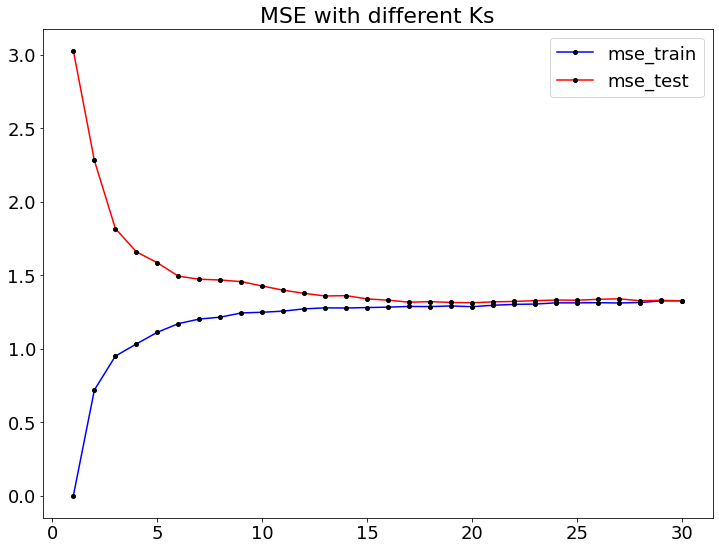

In [ ]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(np.arange(30)+1, mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(30)+1, mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=18)
plt.title('MSE with different Ks', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [ ]:
# optimal k
np.argmin(mse_test)+1

20

In [ ]:
# optimal MSE
min(mse_test)

1.3122466216216218

In [ ]:
P_MSEs.loc['KNN','DO'] = min(mse_test)

### LASSO

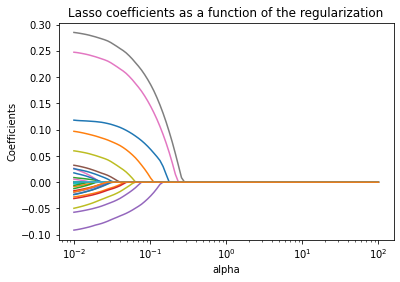

In [ ]:
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [ ]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.04862601580065353


In [ ]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train.columns))

The coefficients are:
feelslike                0.098647
precip                  -0.000000
uvindex                  0.000000
ward2_accidents         -0.000000
seasons_Winter          -0.059411
day_of_week_Monday      -0.000000
day_of_week_Saturday     0.000000
day_of_week_Sunday      -0.000000
day_of_week_Thursday     0.000000
day_of_week_Tuesday     -0.000000
day_of_week_Wednesday    0.000000
member_casual_member     0.061823
end_hour_1              -0.000000
end_hour_2              -0.000000
end_hour_6              -0.023531
end_hour_7               0.000000
end_hour_8               0.206992
end_hour_9               0.246038
end_hour_10              0.019234
end_hour_11             -0.000000
end_hour_12              0.000000
end_hour_13             -0.000000
end_hour_14             -0.000000
end_hour_15             -0.000432
end_hour_16             -0.000000
end_hour_17              0.000000
end_hour_18              0.000000
end_hour_19             -0.000000
end_hour_20             -0

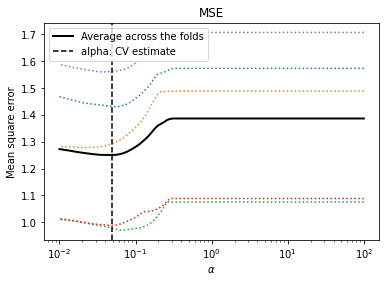

In [ ]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [ ]:
lasso.set_params(alpha=lassocv.alpha_)
y_pred=lasso.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 1.125


In [ ]:
P_MSEs.loc['LASSO','DO'] = mse

### Ridge Regression

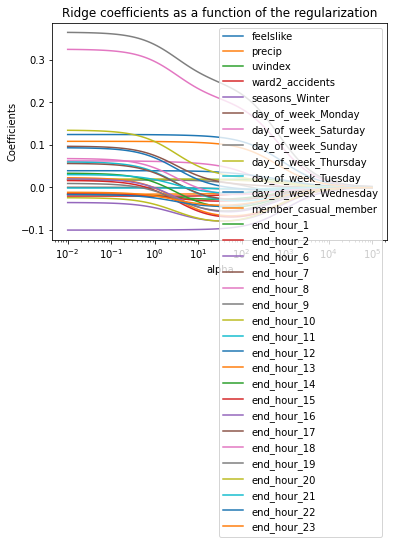

In [ ]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization');

In [ ]:
# standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [ ]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
feelslike                0.056685
precip                  -0.006024
uvindex                  0.014468
ward2_accidents         -0.002981
seasons_Winter          -0.050928
day_of_week_Monday      -0.003628
day_of_week_Saturday     0.000826
day_of_week_Sunday      -0.010227
day_of_week_Thursday     0.010579
day_of_week_Tuesday     -0.001006
day_of_week_Wednesday    0.016270
member_casual_member     0.042928
end_hour_1              -0.011252
end_hour_2              -0.014219
end_hour_6              -0.038063
end_hour_7               0.001725
end_hour_8               0.086021
end_hour_9               0.102745
end_hour_10              0.007603
end_hour_11             -0.017419
end_hour_12             -0.006205
end_hour_13             -0.034206
end_hour_14             -0.020633
end_hour_15             -0.035671
end_hour_16             -0.026303
end_hour_17             -0.012465
end_hour_18             -0.007719
end_hour_19             -0.022488
end_hour_20             -0

In [ ]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 205.65123083486515


In [ ]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
feelslike                0.096403
precip                  -0.012081
uvindex                  0.018749
ward2_accidents         -0.010154
seasons_Winter          -0.083826
day_of_week_Monday      -0.005668
day_of_week_Saturday     0.023997
day_of_week_Sunday      -0.001854
day_of_week_Thursday     0.014705
day_of_week_Tuesday     -0.004183
day_of_week_Wednesday    0.027159
member_casual_member     0.080955
end_hour_1              -0.022151
end_hour_2              -0.026256
end_hour_6              -0.068567
end_hour_7               0.004648
end_hour_8               0.161482
end_hour_9               0.191980
end_hour_10              0.017754
end_hour_11             -0.030068
end_hour_12             -0.005690
end_hour_13             -0.060375
end_hour_14             -0.040504
end_hour_15             -0.062806
end_hour_16             -0.049444
end_hour_17             -0.025035
end_hour_18             -0.015382
end_hour_19             -0.046292
end_hour_20             -0

In [ ]:
y_pred=ridge.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 1.122


In [ ]:
P_MSEs.loc['Ridge Regression','DO'] = mse

### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train), y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.07084293745297066


In [ ]:
# with the best alpha
EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train), y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))


The coefficients are:
feelslike                0.103477
precip                  -0.000000
uvindex                  0.000000
ward2_accidents         -0.000000
seasons_Winter          -0.066930
day_of_week_Monday      -0.000000
day_of_week_Saturday     0.000000
day_of_week_Sunday      -0.000000
day_of_week_Thursday     0.000000
day_of_week_Tuesday     -0.000000
day_of_week_Wednesday    0.000000
member_casual_member     0.071546
end_hour_1              -0.000000
end_hour_2              -0.000000
end_hour_6              -0.035459
end_hour_7               0.002177
end_hour_8               0.211254
end_hour_9               0.248643
end_hour_10              0.029268
end_hour_11             -0.000000
end_hour_12              0.000000
end_hour_13             -0.010522
end_hour_14             -0.000000
end_hour_15             -0.012733
end_hour_16             -0.000000
end_hour_17              0.000000
end_hour_18              0.000000
end_hour_19             -0.000000
end_hour_20             -0

In [ ]:
en_p = EN.intercept_

In [ ]:
y_pred=EN.predict(scale(X_test.values))
P_bestDOmodel = y_pred
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 1.119


In [ ]:
P_MSEs.loc['Elastic Net','DO'] = mse

## Pickup and Dropoff Model Results

In [ ]:
P_MSEs

,PU,DO
MLR,1.053000,1.121000
Polynomial,1.067200,1.139571
KNN,1.159763,1.312247
LASSO,1.038000,1.125000
Ridge Regression,1.044000,1.122000
Elastic Net,1.039000,1.119000


In [ ]:
print('The best pickup model is:',
      P_MSEs.loc[P_MSEs['PU'] == min(P_MSEs['PU']),'PU'])

The best pickup model is: LASSO    1.038
Name: PU, dtype: float64


In [ ]:
print('The best dropoff model is:',
      P_MSEs.loc[P_MSEs['DO'] == min(P_MSEs['DO']),'DO'])

The best dropoff model is: Elastic Net    1.119
Name: DO, dtype: float64


# Final

In [ ]:
df_weather['month'] = df_weather['datetime'].dt.month 
# values used to justify precip, uv, feels like, crashes etc using month 4 (april) as a test day

In [ ]:
df_weather.groupby('month', as_index=False)['feelslike'].mean()

,month,feelslike
0,1,27.093548
1,2,37.485714
2,3,47.458065
3,4,55.040000
4,5,67.193548
5,6,75.956667
6,7,82.051613
7,8,80.825806
8,9,72.340000
9,10,56.938710


In [ ]:
df_weather.groupby('month', as_index=False)['precip'].mean()

,month,precip
0,1,0.110161
1,2,0.079036
2,3,0.083806
3,4,0.119400
4,5,0.191194
5,6,0.083667
6,7,0.171839
7,8,0.069419
8,9,0.055233
9,10,0.088613


In [ ]:
df_weather.groupby('month', as_index=False)['uvindex'].mean()

,month,uvindex
0,1,3.290323
1,2,4.678571
2,3,5.064516
3,4,6.400000
4,5,5.096774
5,6,6.733333
6,7,5.322581
7,8,7.387097
8,9,7.266667
9,10,5.193548


In [ ]:
df_crashes2['month'] = df_crashes2['FROMDATE'].dt.month

In [ ]:
df_crashes2.groupby('month', as_index=False)['ward2_accidents'].mean()

,month,ward2_accidents
0,1,9.618644
1,2,10.197674
2,3,11.268018
3,4,12.035885
4,5,11.536585
5,6,11.953846
6,7,10.666667
7,8,9.948936
8,9,11.192053
9,10,12.141328


## Rebalancing for I St 

### Pickup - Elastic Net

In [ ]:
# create formula using elastic net coefficients.
# goal of predicting hourly pickups and drop offs, then to calculate daily pick ups and drop offs, and difference displays need to rebalance
# the feels like mean and precip mean and UV index are the average april temperature, precipitation, and uv index from the data as we move to spring
# the ward 2 accidents value is average accidents in april
# season winter =0 because we are attempting to predict a spring value
# day of week is tuesday to reflect the day with the highest demand for PU and DO for I street
# member is 1 because most of the users are members
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1

In [ ]:
start_hour_1 = 1
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0

In [ ]:
en_PU_I_1=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
en_PU_I_1 # hour 1 pickups, 21st & I street

11.761206613111376

In [ ]:
start_hour_1 = 0
start_hour_2 = 1
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_2=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
en_PU_I_2 # hour 2 pickups, 21st & I street

11.819404613111375

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 1
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
en_PU_I_3=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
en_PU_I_3 # hour 3 pickups, 21st & I street

11.803539613111376

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 1
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_4=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
en_PU_I_4 # hour 4 pickups, 21st & I street

11.792424613111375

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 1
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_5=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
en_PU_I_5 # hour 5 pickups, 21st & I street

11.790723613111377

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 1
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_6=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
en_PU_I_6 # hour 6 pickups, 21st & I street

11.775586613111376

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 1
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_7=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
en_PU_I_7 # hour 7 pickups, 21st & I street

11.769129613111376

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 1
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_8=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
en_PU_I_8 # hour 8 pickups, 21st & I street

11.767209613111376

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 1
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_9=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
en_PU_I_9 # hour 9 pickups, 21st & I street

11.811371613111376

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 1
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_10=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
en_PU_I_10 # hour 10 pickups, 21st & I street

11.910014613111375

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 1
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_11=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
en_PU_I_11 # hour 11 pickups, 21st & I street

11.839179613111376

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 1
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_12=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
en_PU_I_12 # hour 12 pickups, 21st & I street

12.041796613111377

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 1
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_13=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
en_PU_I_13 # hour 13 pickups, 21st & I street

12.015900613111377

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 1
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_14=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
en_PU_I_14 # hour 14 pickups, 21st & I street

12.048207613111376

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 1
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_15=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
en_PU_I_15 # hour 15 pickups, 21st & I street

12.236744613111377

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 1
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_16=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
en_PU_I_16 # hour 16 pickups, 21st & I street

12.125066613111375

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 1
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_17=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
en_PU_I_17 # hour 17 pickups, 21st & I street

12.151171613111377

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 1
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_18=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
en_PU_I_18 # hour 18 pickups, 21st & I street

12.075675613111375

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 1
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_19=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 1
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_20=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 1
start_hour_22 = 0
start_hour_23 = 0
en_PU_I_21=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 1
start_hour_23 = 0
en_PU_I_22=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 1
en_PU_I_23=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
start_hour_1 = 0
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
start_hour_24 = 1
en_PU_I_24=en_i+0.178428*feelslikemean+-0.050319*precipmean+0.100821*uvindex+-0.099015*ward2_accidents+-0.080936*seasons_Winter+0.053302*day_of_week_Monday +-0.040721*day_of_week_Saturday+-0.172848*day_of_week_Sunday+0.030209*day_of_week_Thursday +0.039902*day_of_week_Tuesday+0.098014*day_of_week_Wednesday+0.274321*member +-0.050165*start_hour_1+0.008033*start_hour_2+-0.007832*start_hour_3+-0.018947*start_hour_4+-0.020648*start_hour_5+-0.035785*start_hour_6+-0.042242*start_hour_7+-0.044162*start_hour_8+0.000000*start_hour_9+0.098643*start_hour_10+0.027808*start_hour_11+0.230425*start_hour_12+0.204529*start_hour_13+0.236836*start_hour_14+0.425373*start_hour_15+0.313695*start_hour_16+0.339800*start_hour_17+0.264304*start_hour_18+0.236064*start_hour_19+0.200342*start_hour_20+0.130989*start_hour_21+0.043837*start_hour_22+-0.026957*start_hour_23

In [ ]:
list_PU_I_hours = round(sum([en_PU_I_1, en_PU_I_2, en_PU_I_3, en_PU_I_4, en_PU_I_5, en_PU_I_6, en_PU_I_7, en_PU_I_8, en_PU_I_9, en_PU_I_10, en_PU_I_11, en_PU_I_12, en_PU_I_13, en_PU_I_14, en_PU_I_15, en_PU_I_16, en_PU_I_17, en_PU_I_18, en_PU_I_19, en_PU_I_20, en_PU_I_21, en_PU_I_22, en_PU_I_23]))

In [ ]:
print(f"Total Number of Pick Ups at 21st and I on a Tuesday: {list_PU_I_hours}") # using average spring weather (avg of april)

Total Number of Pick Ups at 21st and I on a Tuesday: 274


### Dropoff - Lasso

In [ ]:
# lasso was best 21st and I drop off model
# keep same feels like, precip, uv, ward2, season, member, day of week
# again calculate dropoffs for each hour
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 1 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_1=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_1)

16.57038399463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0 
end_hour_2 = 1
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_2=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_2)

16.56591799463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 1
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_3=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_3)

16.56110699463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 1
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_4=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_4)

16.564315994637038


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 1
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_5=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_5)

16.56677499463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 1
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_6=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_6)

16.47297299463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 1
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_7=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_7)

16.57588799463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 1
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_8=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_8)

16.80799999463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 1
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_9=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_9)

16.98579099463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 1
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_10=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_10)

16.73966999463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 1
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_11=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_11)

16.57588799463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 1
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_12=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_12)

16.57588799463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 1
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_13=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_13)

16.57588799463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 1
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_14=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_14)

16.57588799463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 1
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_15=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_15)

16.57107399463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 1
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_16=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_16)

16.57588799463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 1
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 1
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_17=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_17)

16.612790994637038


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 1
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_18=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_18)

16.62287399463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 19
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_19=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_19)

15.16802599463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 1
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_20=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_20)

16.46275899463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 1
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_21=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_21)

16.47968899463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 1
end_hour_23 = 0

In [ ]:
lasso_DO_i_22=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_22)

16.47305299463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 1

In [ ]:
lasso_DO_i_23=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_23)

16.54071499463704


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 1
day_of_week_Wednesday = 0
member = 1
end_hour_1 = 0
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0

In [ ]:
lasso_DO_i_24=lasso_i+0.255192*feelslikemean+-0.033414*precipmean+0.105883*uvindex+-0.082044*ward2_accidents+0.000000*seasons_Winter+0.138202*day_of_week_Monday +-0.120158*day_of_week_Saturday+-0.151990*day_of_week_Sunday+0.010394*day_of_week_Thursday +0.079400*day_of_week_Tuesday+0.046325*day_of_week_Wednesday+0.439384*member+-0.005504*end_hour_1+-0.009970*end_hour_2+-0.014781*end_hour_3+-0.011572*end_hour_4+-0.009113*end_hour_5+-0.102915*end_hour_6+-0.000000*end_hour_7+0.232112*end_hour_8+0.409903*end_hour_9+0.163782*end_hour_10+0.000000*end_hour_11+0.000000*end_hour_12+0.000000*end_hour_13+0.000000*end_hour_14+-0.004814*end_hour_15+-0.000000*end_hour_16+0.036903*end_hour_17+0.046986*end_hour_18+-0.074098*end_hour_19+-0.113129*end_hour_20+-0.096199*end_hour_21+-0.102835*end_hour_22+-0.035173*end_hour_23
print(lasso_DO_i_24)

16.57588799463704


In [ ]:
list_DO_i_hours = round(sum([lasso_DO_i_1, lasso_DO_i_2, lasso_DO_i_3, lasso_DO_i_4, lasso_DO_i_5, lasso_DO_i_6, lasso_DO_i_7, lasso_DO_i_8, lasso_DO_i_9, lasso_DO_i_10, lasso_DO_i_11, lasso_DO_i_12, lasso_DO_i_13, lasso_DO_i_14, lasso_DO_i_15, lasso_DO_i_16, lasso_DO_i_17, lasso_DO_i_18, lasso_DO_i_19, lasso_DO_i_20, lasso_DO_i_21, lasso_DO_i_22, lasso_DO_i_23]))
print(list_DO_i_hours) # total sum of drop offs for entire day

380


In [ ]:
list_DO_i_hours - list_PU_I_hours #difference between drop offs and pickups

106

In [ ]:
106/24 #average difference between dropoffs and pickups hours, roughly 4.41 bikes need to be rebalanced or stations added per hour for a given tuesday

4.416666666666667

## Rebalancing for Penn

### Pickup - Lasso

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 1 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0

In [ ]:
lasso_PU_P_1=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
lasso_PU_P_1

1.686834185740741

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 1
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_2=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
print(lasso_PU_P_2)

1.6797961857407409


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 1
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_3=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
print(lasso_PU_P_3)

1.6797961857407409


In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 1
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_4=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 1
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_5=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 1
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_6=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 1
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_7=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 1
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_8=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 1
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_9=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 1
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_10=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 1
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_11=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 1
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_12=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 1
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_13=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 1
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_14=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 1
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_14=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 1
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_15=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 1
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_16=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 1
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_17=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 1
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_18=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 1
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_19=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 1
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_20=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 1
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_21=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 1
start_hour_23 = 0
lasso_PU_P_22=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 1
lasso_PU_P_23=lasso_p+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
lasso_PU_P_23

1.6554851857407409

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1
start_hour_1 = 0 
start_hour_2 = 0
start_hour_3 = 0
start_hour_4 = 0
start_hour_5 = 0
start_hour_6 = 0
start_hour_7 = 0
start_hour_8 = 0
start_hour_9 = 0
start_hour_10 = 0
start_hour_11 = 0
start_hour_12 = 0
start_hour_13 = 0
start_hour_14 = 0
start_hour_15 = 0
start_hour_16 = 0
start_hour_17 = 0
start_hour_18 = 0
start_hour_19 = 0
start_hour_20 = 0
start_hour_21 = 0
start_hour_22 = 0
start_hour_23 = 0
lasso_PU_P_24=lasso.intercept_+0.000000*feelslikemean+-0.020750*precipmean+0.018123*uvindex+0.000000*ward2_accidents+-0.145459*seasons_Winter+-0.000000*day_of_week_Monday +0.000000*day_of_week_Saturday+-0.054881*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.025557*member +0.007038*start_hour_1+0.000000*start_hour_2+-0.000000*start_hour_4+-0.000000*start_hour_5+ -0.000000*start_hour_7+-0.000000*start_hour_8+-0.020974*start_hour_9+0.000000*start_hour_10+ -0.000000*start_hour_11+-0.000000*start_hour_12+0.000000*start_hour_13+-0.000000*start_hour_14+ 0.030138*start_hour_15+0.217315*start_hour_16+0.156693*start_hour_17+0.003427*start_hour_18+ -0.000000*start_hour_19+-0.000000*start_hour_20+-0.019699*start_hour_21+-0.010849*start_hour_22+ -0.024311*start_hour_23

In [ ]:
lasso_PU_P_24

1.8864238660526318

In [ ]:
list_PU_P_hours = round(sum([lasso_PU_P_1, lasso_PU_P_2, lasso_PU_P_3, lasso_PU_P_4, lasso_PU_P_5, lasso_PU_P_6, lasso_PU_P_7, lasso_PU_P_8, lasso_PU_P_9, lasso_PU_P_10, lasso_PU_P_11, lasso_PU_P_12, lasso_PU_P_13, lasso_PU_P_14, lasso_PU_P_15, lasso_PU_P_16, lasso_PU_P_17, lasso_PU_P_18, lasso_PU_P_19, lasso_PU_P_20, lasso_PU_P_21, lasso_PU_P_22, lasso_PU_P_23, lasso_PU_P_24]))

In [ ]:
list_PU_P_hours = round(sum([lasso_PU_P_1, lasso_PU_P_2, lasso_PU_P_3, lasso_PU_P_4, lasso_PU_P_5, lasso_PU_P_6, lasso_PU_P_7, lasso_PU_P_8, lasso_PU_P_9, lasso_PU_P_10, lasso_PU_P_11, lasso_PU_P_12, lasso_PU_P_13, lasso_PU_P_14, lasso_PU_P_15, lasso_PU_P_16, lasso_PU_P_17, lasso_PU_P_18, lasso_PU_P_19, lasso_PU_P_20, lasso_PU_P_21, lasso_PU_P_22, lasso_PU_P_23, lasso_PU_P_24]))
print(f"Total Number of Pick Ups at 21st and Penn on a Wednesday: {list_PU_P_hours}") # using average spring weather (avg of april)

Total Number of Pick Ups at 21st and Penn on a Wednesday: 41


### Dropoff - Elastic Net

In [ ]:
feelslikemean = 55.040000
precipmean = 0.1199400 
uvindex = 6.4
ward2_accidents = 12.035885
seasons_Winter = 0
day_of_week_Monday = 0 
day_of_week_Saturday = 0 
day_of_week_Sunday = 0 
day_of_week_Thursday = 0
day_of_week_Tuesday = 0
day_of_week_Wednesday = 1
member = 1

In [ ]:
end_hour_1 = 1 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_1=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
print(EN_DO_P_1)

7.514288501052631


In [ ]:
end_hour_1 = 0 
end_hour_2 = 1
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_2=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
print(EN_DO_P_2)

7.514288501052631


In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 1
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_3=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
print(EN_DO_P_3)

7.514288501052631


In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 1
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_4=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
print(EN_DO_P_4)

7.514288501052631


In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 1
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_5=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
print(EN_DO_P_5)

7.514288501052631


In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 1
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_6=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
print(EN_DO_P_6)

7.478829501052631


In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 1
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_7=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
print(EN_DO_P_7)

7.516465501052631


In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 1
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_8=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
EN_DO_P_8

7.725542501052631

In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 1
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_9=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 1
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_10=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 1
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_11=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 1
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_12=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 1
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_12=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 1
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_13=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 1
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_14=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 1
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_15=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 1
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_16=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 1
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_17=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 1
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_18=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 1
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_19=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 1
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_20=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 1
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_21=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 1
end_hour_23 = 0
EN_DO_P_22=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 1
EN_DO_P_23=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
end_hour_1 = 0 
end_hour_2 = 0
end_hour_3 = 0
end_hour_4 = 0
end_hour_5 = 0
end_hour_6 = 0
end_hour_7 = 0
end_hour_8 = 0
end_hour_9 = 0
end_hour_10 = 0
end_hour_11 = 0
end_hour_12 = 0
end_hour_13 = 0
end_hour_14 = 0
end_hour_15 = 0
end_hour_16 = 0
end_hour_17 = 0
end_hour_18 = 0
end_hour_19 = 0
end_hour_20 = 0
end_hour_21 = 0
end_hour_22 = 0
end_hour_23 = 0
EN_DO_P_24=en_p+0.103477*feelslikemean+-0.000000*precipmean+0.000000*uvindex+-0.000000*ward2_accidents+-0.066930*seasons_Winter+-0.000000*day_of_week_Monday +-0.000000*day_of_week_Saturday+-0.000000*day_of_week_Sunday+-0.000000*day_of_week_Thursday +0.000000*day_of_week_Tuesday+0.000000*day_of_week_Wednesday+0.071546*member+-0.000000*end_hour_1+0.000000*end_hour_2+-0.000000*end_hour_4+-0.000000*end_hour_5+-0.035459*end_hour_6+0.002177*end_hour_7+0.211254*end_hour_8+0.248643*end_hour_9+0.029268*end_hour_10+-0.000000*end_hour_11+-0.000000*end_hour_12+-0.010522*end_hour_13+-0.000000*end_hour_14+-0.012733*end_hour_15+-0.000000*end_hour_16+0.000000*end_hour_17+0.000000*end_hour_18+ -0.000000*end_hour_19+-0.023214*end_hour_20+-0.000000*end_hour_21+-0.000000*end_hour_22+-0.000000*end_hour_23

In [ ]:
list_DO_P_hours = round(sum([EN_DO_P_1, EN_DO_P_2, EN_DO_P_3, EN_DO_P_4, EN_DO_P_5, EN_DO_P_6, EN_DO_P_7, EN_DO_P_8, EN_DO_P_9, EN_DO_P_10, EN_DO_P_11, EN_DO_P_12, EN_DO_P_13, EN_DO_P_14, EN_DO_P_15, EN_DO_P_16, EN_DO_P_17, EN_DO_P_18, EN_DO_P_19, EN_DO_P_20, EN_DO_P_21, EN_DO_P_22, EN_DO_P_23, EN_DO_P_24]))
print(f"Total Number of Drop Offs at 21st and Penn on a Wednesday: {list_DO_P_hours}")

Total Number of Drop Offs at 21st and Penn on a Wednesday: 181


In [ ]:
list_DO_P_hours - list_PU_P_hours

140

In [ ]:
140/24 # roughly 6 bikes need to be rebalanced or docks added per hour for a given wednesday at the Penn station with avg april temperatures for members

5.833333333333333